# Données

## Chargement du dataframe global

In [1]:
import pandas as pd

df = pd.read_parquet("./data/df_final.parquet")
print("✅ Dataset rechargé avec succès.")

✅ Dataset rechargé avec succès.


In [2]:
df.shape

(2988181, 66)

In [3]:
df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,...,31,32,33,34,35,36,37,38,39,40
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,...,-0.321484,0.910162,-0.413011,0.680835,-0.418409,-0.526443,0.305625,-0.307805,-0.606366,-0.650556
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,...,-1.001013,0.797471,-0.492230,-0.305857,-1.307835,0.354010,0.696917,-0.486316,0.017210,-1.563045
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,...,-0.269690,0.873445,0.194144,0.056367,-0.431036,-0.020383,-0.376942,0.814494,0.709722,-1.030146
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,...,0.144034,-2.457183,-1.500929,-1.807169,-0.208940,-0.671638,-0.407914,2.561696,-1.379031,-1.877568
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,...,-1.163678,-0.230112,-2.132536,-0.729996,0.581913,-0.559910,-0.354824,-0.914158,-0.064399,-0.354175


In [4]:
df.columns

Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type', 'user_status', 'click_datetime',
       'session_start_datetime', 'article_id', 'category_id', 'created_at_ts',
       'publisher_id', 'words_count', 'cluster', 'publish_time_dt', 'nb_clics',
       'popularite_tag', 'popularity_norm', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40'],
      dtype='object')

In [5]:
df["user_status"].unique()

array(['normal', 'power_user'], dtype=object)

## Table pré-agrégée utilisateur-clics

<div style="padding: 10px; border-radius: 5px; background-color: #e7f3fe; color: #31708f; border-left: 6px solid #2196F3;">
ℹ️ <strong>Note pour le déploiement :</strong> Le calcul avec la récence et la popularité est assez lent il faudra faire une table pré-compilée
</div>

In [6]:
user_clicks_df = (
    df.sort_values(by=['user_id', 'click_timestamp'])
      .groupby('user_id')['click_article_id']
      .apply(list)
      .reset_index()
      .rename(columns={'click_article_id': 'clicked_article_ids'})
)


user_clicks_df.head()
# sauvegarde en parquet ou json (mieux pour utilisation dans une app)
# user_clicks_df.set_index('user_id').to_json("./data/user_clicks.json", orient='index')

,user_id,clicked_article_ids
0,0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,1,"[235840, 96663, 59758, 160474, 285719, 156723,..."
2,2,"[119592, 30970, 30760, 209122]"
3,3,"[236065, 236294, 234686, 233769, 235665, 23513..."
4,4,"[48915, 44488, 195887, 195084, 63307, 336499, ..."


In [7]:
# Pour un accès rapide dans les fonctions
user_clicks_dict = dict(zip(user_clicks_df['user_id'], user_clicks_df['clicked_article_ids']))

## Liste des articles

In [8]:
df_articles = pd.read_csv("./data/articles_with_popularity.csv", encoding='utf-8')
df_articles

,article_id,category_id,created_at_ts,publisher_id,words_count,cluster,publish_time_dt,nb_clics,popularite_tag,popularity_norm
0,0,0,1513144419000,0,168,16,2017-12-13 05:53:39,0,jamais_cliqué,0.000000
1,1,1,1405341936000,0,189,11,2014-07-14 12:45:36,0,jamais_cliqué,0.000000
2,2,1,1408667706000,0,250,3,2014-08-22 00:35:06,0,jamais_cliqué,0.000000
3,3,1,1408468313000,0,230,3,2014-08-19 17:11:53,1,banal,0.000027
4,4,1,1407071171000,0,162,3,2014-08-03 13:06:11,0,jamais_cliqué,0.000000
...,...,...,...,...,...,...,...,...,...,...
364042,364042,460,1434034118000,0,144,2,2015-06-11 14:48:38,0,jamais_cliqué,0.000000
364043,364043,460,1434148472000,0,463,7,2015-06-12 22:34:32,8,banal,0.000215
364044,364044,460,1457974279000,0,177,6,2016-03-14 16:51:19,0,jamais_cliqué,0.000000
364045,364045,460,1515964737000,0,126,1,2018-01-14 21:18:57,0,jamais_cliqué,0.000000


## Chargement des embeddings réduits

In [9]:
import pandas as pd

embeddings_df = pd.read_parquet('./data/articles_embeddings_pca.parquet')
print(embeddings_df.shape)

(364047, 41)


In [10]:
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
article_id,,,,,,,,,,,,,,,,,,,,,
0,-1.854453,-5.592402,1.708724,-3.835164,1.415795,0.252210,0.426074,0.545480,-0.807394,1.520171,...,0.387738,-0.088799,0.990514,1.060148,-0.218378,-1.099852,-1.175524,1.370632,-0.264816,0.010117
1,-5.361997,4.122991,-2.357516,-3.428017,-0.431079,3.722260,2.389835,-1.267244,1.944162,2.980629,...,0.025565,-0.721510,0.649929,-0.405225,-0.090690,-3.094968,0.075186,0.245235,-1.250343,0.294538
2,-3.600085,-0.132112,-6.027451,0.985617,0.211965,4.591712,-1.815688,-2.170389,-2.783090,2.804910,...,0.565647,-1.862223,-0.336458,0.072410,0.241466,-0.877634,0.154883,1.133963,0.946740,-1.811314
3,-1.158963,7.293352,-5.916713,-1.370524,2.172241,-1.682487,1.070822,-2.160001,1.947324,4.069597,...,0.074049,-0.612824,-1.511408,1.071736,1.991838,-2.076190,-1.690459,-1.122692,0.714619,-1.576244
4,-1.142884,2.569328,-2.891860,-0.273997,2.913007,5.608970,0.308953,0.310888,-1.054171,2.158180,...,-1.527867,-0.155615,-0.163345,0.037253,1.173636,-4.232923,-1.287476,1.053438,-0.486085,-0.144550





<div style="padding: 10px; border-radius: 5px; background-color: #f8d7da; color: #721c24; border-left: 6px solid #f44336;">
🚨 <strong>Important :</strong> <br> 💥 Si on veut une matrice de similarité complète sa taille (364 047 x 364 047) = 132 teraelements, soit ~494 Go de RAM en float32 🤯 <br>
On est dans une optique MVP avec un déploiement serverless, donc les modèles, fonctions, tables utilisées seront:<br>
📦 Compact : on passe d’un DataFrame d’interactions énorme à une simple table d'utilisateurs.<br>
🚀 Rapide à charger en mémoire (idéal pour des microservices).<br>
🔁 Facile à sérialiser (JSON, pickle, feather, parquet, etc.)<br>
💬 Compatible avec une API GET /recommendations?user_id=123
</div>

In [11]:
# conversion des embeddings en tableau NumPy (évite de calculer la matrice de similarité complète)
import numpy as np
article_ids = embeddings_df.index.to_numpy()
article_embeddings = embeddings_df.to_numpy()

# dictionnaire article_id -> vecteur
embedding_dict = dict(zip(article_ids, article_embeddings))

# 🧪 Exploration de différentes approches de recommandation

## Approche dummy pour situer la qualité des recommandations (popularité)

In [57]:
import numpy as np
import pandas as pd

class MostPopularRecommender:
    def __init__(self, user_clicks_dict, df_articles, popularity_col="popularity_norm"):
        """
        user_clicks_dict : dictionnaire {user_id: [clicked_article_ids]} triés chronologiquement
        df_articles : DataFrame avec les métadonnées des articles, incluant leur popularité normalisée
        popularity_col : nom de la colonne représentant la popularité normalisée dans df_articles
        """
        self.user_clicks_dict = user_clicks_dict
        self.df_articles = df_articles
        self.popularity_col = popularity_col

        # Liste triée des articles les plus populaires
        self.popular_articles = (
            df_articles
            .dropna(subset=["article_id", popularity_col])
            .drop_duplicates("article_id")
            .sort_values(by=popularity_col, ascending=False)["article_id"]
            .tolist()
        )

    def recommend(self, user_id, k=5):
        # Articles déjà vus par l'utilisateur (ou liste vide)
        user_clicked = self.user_clicks_dict.get(user_id, [])

        # Sélection des articles populaires non vus
        unseen_articles = [aid for aid in self.popular_articles if aid not in user_clicked]

        if not unseen_articles:
            print(f"Avertissement : l'utilisateur {user_id} a vu tous les articles populaires.")
            return self.popular_articles[:k]

        return unseen_articles[:k]


In [58]:
# Création du modèle
most_pop_model = MostPopularRecommender(user_clicks_dict, df_articles)

# Recommandation pour un user
most_pop_model.recommend(user_id=42, k=5)

print("Articles recommandés :", recommendations)


Articles recommandés : [160974, 272143, 234698, 123909, 336223]


In [59]:
def evaluate_simple_model(
    model,
    user_clicks_df,
    k=5,
    n_users=100,
    seed=42,
    model_name="MostPopularRecommender",
    approche="content-based"
):
    import numpy as np
    import pandas as pd
    from sklearn.metrics import ndcg_score
    from tqdm import tqdm

    np.random.seed(seed)
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    sampled_users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    scores = {"hit@k": [], "map@k": [], "ndcg@k": [], "precision@k": [], "recall@k": []}
    hit_users = []

    # Accès rapide aux clics (on suppose que le modèle les utilise déjà, mais on les reprend ici pour l'évaluation)
    user_clicks_dict = dict(zip(user_clicks_df['user_id'], user_clicks_df['clicked_article_ids']))

    for user_id in tqdm(sampled_users, desc=f"Évaluation modèle simple : {model_name}"):
        user_clicks = user_clicks_dict.get(user_id, [])
        if len(user_clicks) < 1:
            continue

        target = user_clicks[-1]
        top_ids = model.recommend(user_id=user_id, k=k)

        # Hit@k
        hit = int(target in top_ids)
        if hit:
            hit_users.append(user_id)

        # MAP@k
        map_k = next((1.0 / (i + 1) for i, aid in enumerate(top_ids) if aid == target), 0.0)

        # NDCG@k
        relevance = [1 if aid == target else 0 for aid in top_ids]
        ndcg = ndcg_score([relevance], [list(reversed(range(len(relevance))))])

        # Precision / Recall
        true_positives = sum([1 for aid in top_ids if aid in user_clicks])
        precision_k = true_positives / k
        recall_k = true_positives / len(user_clicks)

        # Stockage
        for metric, val in zip(["hit@k", "map@k", "ndcg@k", "precision@k", "recall@k"],
                               [hit, map_k, ndcg, precision_k, recall_k]):
            scores[metric].append(val)

    summary = {
        "modèle": model_name,
        "approche": approche,
        "n_users": len(sampled_users),
        f"Hit@{k}": np.mean(scores["hit@k"]),
        f"MAP@{k}": np.mean(scores["map@k"]),
        f"NDCG@{k}": np.mean(scores["ndcg@k"]),
        f"Precision@{k}": np.mean(scores["precision@k"]),
        f"Recall@{k}": np.mean(scores["recall@k"])
    }

    return summary, hit_users


In [60]:
summary, hit_users = evaluate_simple_model(
    model=most_pop_model,
    user_clicks_df=user_clicks_df,
    k=5,
    n_users=1000,
    model_name="MostPopularRecommender",
    approche="content-based"
)


Évaluation modèle simple : MostPopularRecommender: 100%|██████████| 1000/1000 [00:19<00:00, 52.02it/s]


In [67]:
# Affichage structuré et lisible
summary_df = pd.DataFrame([summary])
print(summary_df.round(4))  # pour limiter à 4 décimales

                   modèle       approche  n_users  Hit@5  MAP@5  NDCG@5  \
0  MostPopularRecommender  content-based     1000    0.0    0.0     0.0   

   Precision@5  Recall@5  
0          0.0       0.0  


In [63]:
import os
import pandas as pd

results_csv_path = "./results/eval_results.csv"
existing_df = pd.read_csv(results_csv_path) if os.path.exists(results_csv_path) else pd.DataFrame()
updated_df = pd.concat([existing_df, pd.DataFrame([summary])], ignore_index=True)
updated_df.to_csv(results_csv_path, index=False)

## Fonction de prédiction topN à partir de l'embedding moyen pour un utilisateur

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

On va commencer par une fonction de recommandation la plus simple, un vecteur moyen à partir des clics effectués par l'utilisateur. C'est une approche naïve de type content-based, où l'on calcule la moyenne des embeddings des articles précédemment cliqués par un utilisateur pour prédire son prochain clic.

### Prédiction du dernier clic à partir du profil sur l'embedding moyen

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def predict_topN_articles(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5):
    """
    Recommande les top-N articles les plus similaires à l'historique d’un utilisateur.

    Retourne :
    - Liste top-N : (article_id, similarité)
    - Dernier article cliqué (target) pour évaluation
    """
    # 1. Récupérer les clics utilisateur
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    # 2. Séparer les clics passés et la cible
    target_article_id = clicked_article_ids[-1]
    past_article_ids = clicked_article_ids[:-1]

    # 3. Créer le profil utilisateur
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)

    # 4. Calculer les similarités
    similarities = cosine_similarity(mean_embedding, article_embeddings)[0]

    # 5. Exclure uniquement les articles précédemment cliqués (pas le target)
    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    if not candidate_indices:
        return None, target_article_id

    # 6. Retourner les top-N
    top_indices = sorted(candidate_indices, key=lambda i: similarities[i], reverse=True)[:top_n]
    top_n_result = [(article_ids[i], similarities[i]) for i in top_indices]

    return top_n_result, target_article_id


In [15]:
predict_topN_articles(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(278156, 0.7373911),
  (284712, 0.7225366),
  (331770, 0.7225303),
  (279669, 0.7215333),
  (345493, 0.72060627),
  (285310, 0.72059524),
  (345486, 0.720016),
  (278210, 0.71875995),
  (285500, 0.71721554),
  (281826, 0.71547675)],
 315146)

### Prédiction d'un clic aléatoire à partir du profil sur l'embedding moyen

In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_random_target(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5, seed=None):
    """
    Même logique que predict_topN_articles, mais avec un clic aléatoire de la session comme cible à prédire.
    """
    if seed is not None:
        np.random.seed(seed)

    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_index = np.random.choice(len(clicked_article_ids))
    target_article_id = clicked_article_ids[target_index]
    past_article_ids = clicked_article_ids[:target_index] + clicked_article_ids[target_index+1:]

    # Embeddings du profil
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors or target_article_id not in embedding_dict:
        return None, target_article_id

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)
    similarities = cosine_similarity(mean_embedding, article_embeddings)[0]

    # Exclure les articles déjà vus (hors target)
    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    top_indices = sorted(candidate_indices, key=lambda i: similarities[i], reverse=True)[:top_n]
    top_preds = [(article_ids[i], similarities[i]) for i in top_indices]

    return top_preds, target_article_id


In [17]:
predict_random_target(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(278156, 0.7369048),
  (282193, 0.72647107),
  (279669, 0.72424054),
  (331770, 0.7233632),
  (284712, 0.7226231),
  (345493, 0.72193897),
  (278210, 0.7218135),
  (286298, 0.7185473),
  (281596, 0.71418697),
  (281826, 0.7134569)],
 292749)

## Fonction de prédiction du top-N pondérée par récence et fraicheur des articles

### Prédiction du dernier clic à partir du profil embedding moyen pondéré par récence et fraicheur des articles

In [18]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_topN_weighted_by_recency(
    user_id,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    alpha=0.9,
    beta=1.0,
    top_n=5
):
    """
    Recommande les top-N articles en pondérant :
    - l'historique utilisateur par la récence des clics (alpha)
    - la recommandation finale par la récence de publication des articles (beta)

    Retour :
    - Liste top-N : (article_id, score_final)
    - article_id du dernier clic
    """
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_article_id = clicked_article_ids[-1]
    past_ids = clicked_article_ids[:-1]

    past_vectors = [embedding_dict[aid] for aid in past_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    embeddings = np.stack(past_vectors)

    # Poids décroissants selon la récence des clics
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)

    # Similarités cosinus
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    # Exclure uniquement les clics passés (pas le target)
    clicked_set = set(past_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set] # les articles déjà cliqués sont écartés

    if not candidate_indices:
        return None, target_article_id

    # Récupérer les timestamps de publication pour les candidats
    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_ids = [article_ids[i] for i in candidate_indices]
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])

    # Calcul du score de fraîcheur (min-max scaling entre 0 et 1)
    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    # Score combiné : similarité * fraîcheur^beta
    sim_scores = similarities[candidate_indices]
    final_scores = sim_scores * (recency_scores ** beta)

    # Top-N
    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


In [19]:
predict_topN_weighted_by_recency(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(288881, 0.7382520902508241),
  (285527, 0.6992101239359438),
  (292978, 0.6889818142694193),
  (331242, 0.6868859490279082),
  (331564, 0.6820750177178082),
  (288735, 0.6767643229870829),
  (285310, 0.6716642259725388),
  (293202, 0.6691473406392486),
  (293266, 0.6616665735747503),
  (348111, 0.6546409627722904)],
 315146)

### Prédiction d'un clic aléatoire à partir du profil embedding moyen pondéré par récence et fraicheur des articles

In [20]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_random_target_weighted(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5, alpha=0.9, beta=1.0, seed=None):
    """
    Variante pondérée de predict_random_target :
    - clic cible tiré au hasard dans la session
    - pondération des clics par récence (alpha)
    - pondération des candidats par fraîcheur (beta)
    """
    if seed is not None:
        np.random.seed(seed)

    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_index = np.random.choice(len(clicked_article_ids))
    target_article_id = clicked_article_ids[target_index]
    past_article_ids = clicked_article_ids[:target_index] + clicked_article_ids[target_index+1:]

    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors or target_article_id not in embedding_dict:
        return None, target_article_id

    embeddings = np.stack(past_vectors)
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]
    if not candidate_indices:
        return None, target_article_id

    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_ids = [article_ids[i] for i in candidate_indices]
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])

    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    sim_scores = similarities[candidate_indices]
    final_scores = sim_scores * (recency_scores ** beta)

    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


In [21]:
predict_random_target_weighted(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(288881, 0.7575377183606363),
  (288735, 0.7257988980142753),
  (288942, 0.717648606170524),
  (348111, 0.7168404621300641),
  (292978, 0.7129233324857354),
  (331564, 0.7093923769017357),
  (331863, 0.6997851261231094),
  (293082, 0.6960912500520599),
  (288665, 0.6924439145205387),
  (293338, 0.6914124273126323)],
 284346)

<div style="padding: 10px; border-radius: 5px; background-color: #e7f3fe; color: #31708f; border-left: 6px solid #2196F3;">
ℹ️ <strong>Information :</strong> On peut envisager aussi une approche par aggrégatin de similarités (par la somme des similarités des clics effectués) ou en calculant la similarité de chaque article cliqué avec l'ensemble des embeddings et en faisant un traitement de sélection.
</div>

## Introduction d'un biais de popularité des articles

In [22]:
def compute_combined_score(user_vector, article_embeddings_df, df_articles, alpha=0.9):
    """
    Calcule un score combiné entre similarité cosinus et popularité normalisée.
    alpha = poids accordé à la similarité de contenu
    (1 - alpha) = poids accordé à la popularité
    """
    from sklearn.metrics.pairwise import cosine_similarity

    # Similarité cosinus
    sim = cosine_similarity([user_vector], article_embeddings_df.values)[0]

    # Popularité normalisée alignée sur l’index
    pop = df_articles.loc[article_embeddings_df.index, "popularity_norm"].values

    # Score final combiné
    return alpha * sim + (1 - alpha) * pop


# ✨ Visualisation à partir d'exemples

## Préparation des données utilisateur

In [23]:
def prepare_user_data(user_clicks_df, embedding_dict, user_id=None, min_clicks=2, debug=False):
    """
    Version optimisée avec table pré-agrégée : sélectionne un utilisateur et calcule son embedding moyen.

    Paramètres :
    - user_clicks_df : DataFrame avec 'user_id' et 'clicked_article_ids' (liste d’IDs)
    - embedding_dict : dict {article_id: embedding vector}
    - user_id : (optionnel) ID à forcer
    - min_clicks : nombre minimum de clics requis
    - debug : bool, infos affichées si True

    Retour :
    - selected_user : ID utilisateur sélectionné
    - clicked_article_ids : liste complète des articles
    - past_article_ids : tous sauf le dernier
    - target_article_id : dernier clic (à prédire)
    - mean_embedding : embedding moyen des articles précédents
    """
    # Compte des clics par utilisateur
    user_click_counts = user_clicks_df['clicked_article_ids'].apply(len)

    if user_id is None:
        mean_clicks = user_click_counts.mean()
        lower_bound = int(mean_clicks * 0.8)
        upper_bound = int(mean_clicks * 1.2)

        eligible_users = user_clicks_df[user_click_counts.between(lower_bound, upper_bound)]

        selected_user = None
        clicked_article_ids = []

        while selected_user is None or len(clicked_article_ids) < min_clicks:
            row = eligible_users.sample(1).iloc[0]
            selected_user = row['user_id']
            clicked_article_ids = row['clicked_article_ids']
    else:
        row = user_clicks_df[user_clicks_df['user_id'] == user_id]
        if row.empty:
            raise ValueError(f"Utilisateur {user_id} introuvable.")
        clicked_article_ids = row.iloc[0]['clicked_article_ids']
        selected_user = user_id
        if len(clicked_article_ids) < min_clicks:
            raise ValueError(f"L'utilisateur {selected_user} n'a que {len(clicked_article_ids)} clic(s).")

    # Séparation des clics passés et cible
    target_article_id = clicked_article_ids[-1]
    past_article_ids = clicked_article_ids[:-1]

    # Extraction des embeddings disponibles
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]

    if not past_vectors:
        raise ValueError(f"Aucun embedding trouvé pour les clics de l’utilisateur {selected_user}.")

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)

    if debug:
        print(f"Utilisateur sélectionné : {selected_user}")
        print(f"Nombre total de clics : {len(clicked_article_ids)}")
        print(f"Article cible : {target_article_id}")
        print(f"Articles précédents : {past_article_ids}")

    return selected_user, clicked_article_ids, past_article_ids, target_article_id, mean_embedding


In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_user_recommendations(user_id, user_clicks_df, embedding_dict, article_ids, article_embeddings, df, top_n=5):
    # Étape 1 : Données utilisateur
    _, clicked_article_ids, past_article_ids, target_article_id, mean_embedding = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=True
    )

    # Étape 2 : Recommandations
    recommendations, _ = predict_topN_articles(
        user_id=user_id,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        top_n=top_n
    )

    recommended_ids = [aid for aid, _ in recommendations]

    # Étape 3 : Vecteurs à projeter
    vectors = []
    labels = []

    # Articles cliqués précédents
    for aid in past_article_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Past Click")

    # Article cible
    if target_article_id in embedding_dict:
        vectors.append(embedding_dict[target_article_id])
        labels.append("Target")

    # Articles recommandés
    for aid in recommended_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Recommendation")

    # t-SNE projection (correction : conversion en np.array)
    X = np.array(vectors)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(X) - 1))  # éviter l'erreur perplexity >= n_samples
    proj = tsne.fit_transform(X)

    # Étape 4 : Visualisation
    color_map = {"Past Click": "blue", "Target": "red", "Recommendation": "green"}

    plt.figure(figsize=(8, 6))
    for label in set(labels):
        idx = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(proj[idx, 0], proj[idx, 1], label=label, color=color_map[label], alpha=0.7, s=60)

    plt.title(f"Projection t-SNE pour l'utilisateur {user_id}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_user_recommendations(user_id, user_clicks_df, embedding_dict, article_ids, article_embeddings, df, top_n=5):
    # Étape 1 : Données utilisateur
    _, clicked_article_ids, past_article_ids, target_article_id, mean_embedding = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=True
    )

    # Étape 2 : Recommandations
    recommendations, _ = predict_topN_articles(
        user_id=user_id,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        top_n=top_n
    )

    recommended_ids = [aid for aid, _ in recommendations]

    # Étape 3 : Vecteurs + labels
    vectors = []
    labels = []
    article_ids_to_plot = []

    for aid in past_article_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Past Click")
            article_ids_to_plot.append(aid)

    if target_article_id in embedding_dict:
        vectors.append(embedding_dict[target_article_id])
        labels.append("Target")
        article_ids_to_plot.append(target_article_id)

    for aid in recommended_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Recommendation")
            article_ids_to_plot.append(aid)

    X = np.array(vectors)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(X) - 1))
    proj = tsne.fit_transform(X)

    color_map = {"Past Click": "blue", "Target": "red", "Recommendation": "green"}

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Graphe 1 : par type
    for label in set(labels):
        idx = [i for i, l in enumerate(labels) if l == label]
        axes[0].scatter(proj[idx, 0], proj[idx, 1], label=label, color=color_map[label], alpha=0.7, s=60)

    axes[0].set_title(f"Projection t-SNE par type pour l'utilisateur {user_id}")
    axes[0].legend()
    axes[0].grid(True)

    # Graphe 2 : colorisation par cluster (sans légende)
    clusters = []
    for aid in article_ids_to_plot:
        if aid in df['article_id'].values:
            clusters.append(df[df['article_id'] == aid]['cluster'].values[0])
        else:
            clusters.append(-1)

    scatter = axes[1].scatter(proj[:, 0], proj[:, 1], c=clusters, cmap='tab10', alpha=0.7, s=60)
    axes[1].set_title(f"Projection t-SNE par cluster pour l'utilisateur {user_id}")
    axes[1].grid(True)

    # Annotations (flèches)
    for i, label in enumerate(labels):
        if label == "Target":
            axes[1].annotate(
                "Target",
                xy=(proj[i, 0], proj[i, 1]),
                xytext=(proj[i, 0] + 5, proj[i, 1] + 5),
                arrowprops=dict(arrowstyle="->", color="red", lw=2),
                color="red"
            )
        elif label == "Recommendation":
            axes[1].annotate(
                "Recommendation",
                xy=(proj[i, 0], proj[i, 1]),
                xytext=(proj[i, 0] + 5, proj[i, 1] + 5),
                arrowprops=dict(arrowstyle="->", color="green", lw=2),
                color="green"
            )

    # Dernier clic (last click)
    if past_article_ids:
        last_click_id = past_article_ids[-1]
        try:
            last_click_idx = article_ids_to_plot.index(last_click_id)
            axes[1].annotate(
                "Last Click",
                xy=(proj[last_click_idx, 0], proj[last_click_idx, 1]),
                xytext=(proj[last_click_idx, 0] + 5, proj[last_click_idx, 1] + 5),
                arrowprops=dict(arrowstyle="->", color="blue", lw=2),
                color="blue"
            )
        except ValueError:
            pass

    plt.tight_layout()
    plt.show()


Utilisateur sélectionné : 42
Nombre total de clics : 31
Article cible : 315146
Articles précédents : [145166, 284346, 157861, 75825, 107216, 313996, 285331, 336380, 129434, 225019, 208518, 119193, 226595, 71608, 336221, 226648, 352902, 288457, 336220, 353673, 235854, 284178, 292749, 285414, 119534, 9126, 331116, 158541, 292594, 218028]


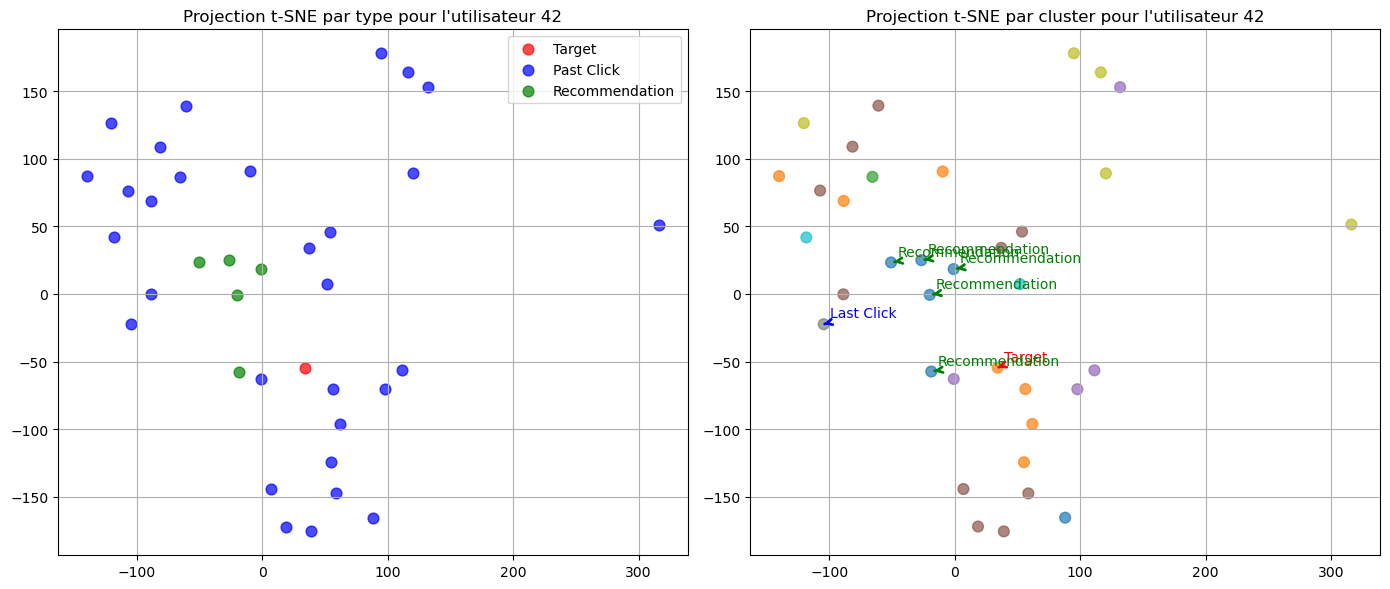

In [26]:
visualize_user_recommendations(
    user_id=42,
    user_clicks_df=user_clicks_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    df=df,  # dataframe avec 'click_article_id' et 'click_timestamp'
    top_n=5
)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

def plot_similarity_heatmap(mean_embedding, embedding_dict, past_article_ids, target_article_id, recommended_ids, title="Similarité cosinus"):
    """
    Affiche une heatmap des similarités entre le vecteur moyen utilisateur et :
    - les articles cliqués
    - l’article cible
    - les articles recommandés
    """
    # Liste des articles à comparer
    items = past_article_ids + [target_article_id] + recommended_ids
    labels = (
        [f"past_{i}" for i in range(len(past_article_ids))] +
        ["target"] +
        [f"rec_{i}" for i in range(len(recommended_ids))]
    )

    # Embeddings des articles
    vectors = [embedding_dict[aid] for aid in items if aid in embedding_dict]

    # Similarités cosinus entre le profil utilisateur et chaque vecteur
    sims = cosine_similarity(mean_embedding, np.stack(vectors))[0]

    # Affichage
    plt.figure(figsize=(12, 1.5))
    ax = sns.heatmap(
        sims.reshape(1, -1),
        annot=True,
        fmt=".2f",
        xticklabels=labels,
        yticklabels=["user_profile"],
        cmap="YlGnBu",
        cbar=False
    )
    plt.title(title)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


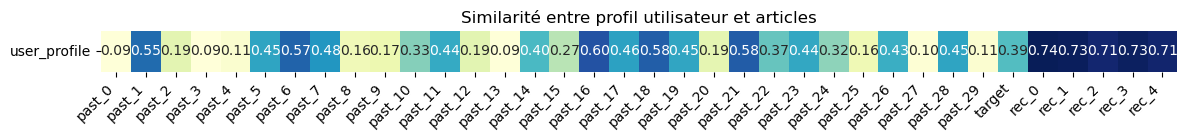

In [28]:
selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
    user_clicks_df, embedding_dict, user_id=42
)

recommendations, _ = predict_topN_articles(
    user_id=42,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    top_n=5
)

recommended_ids = [aid for aid, _ in recommendations]

plot_similarity_heatmap(
    mean_embedding=mean_embed,
    embedding_dict=embedding_dict,
    past_article_ids=past_ids,
    target_article_id=target_id,
    recommended_ids=recommended_ids,
    title="Similarité entre profil utilisateur et articles"
)


Le modèle même le plus simple prédit des éléments très similaires au profil moyen mais l'utilisateur agit autrement (sollicitation externe, influence non modélisée)

## Fonctions de visualisation avancées (histogramme de similarité, TSNE) clics, embedding moyen, clic réel, top-N prédition

In [29]:
def plot_target_similarity_distribution(user_clicks_df, df, embedding_dict, article_ids, article_embeddings, n_users=500):
    import matplotlib.pyplot as plt
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    sims = []
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    for user_id in users:
        clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")["click_article_id"].tolist()
        if len(clicks) < 2:
            continue
        target = clicks[-1]
        past = clicks[:-1]
        past_vecs = [embedding_dict[aid] for aid in past if aid in embedding_dict]
        if target not in embedding_dict or not past_vecs:
            continue
        profile = np.mean(past_vecs, axis=0).reshape(1, -1)
        sim = cosine_similarity(profile, embedding_dict[target].reshape(1, -1))[0][0]
        sims.append(sim)

    sims = np.array(sims)
    q25, q50, q75 = np.percentile(sims, [25, 50, 75])

    colors = ['red' if s < q25 else 'orange' if s < q50 else 'skyblue' if s < q75 else 'green' for s in sims]

    plt.figure(figsize=(10, 5))
    plt.hist(sims, bins=30, color='gray', edgecolor='black', alpha=0.3)
    for color, label in zip(['red', 'orange', 'skyblue', 'green'], ['< Q1', 'Q1–Q2', 'Q2–Q3', '> Q3']):
        plt.axvspan(
            {'red': sims.min(), 'orange': q25, 'skyblue': q50, 'green': q75}[color],
            {'red': q25, 'orange': q50, 'skyblue': q75, 'green': sims.max()}[color],
            color=color, alpha=0.2, label=label
        )

    plt.title("Distribution des similarités profil ↔ target (colorée par quartiles)")
    plt.xlabel("Similarité cosinus")
    plt.ylabel("Nombre d'utilisateurs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Moyenne des similarités : {np.mean(sims):.4f}")
    print(f"Médiane : {np.median(sims):.4f}")


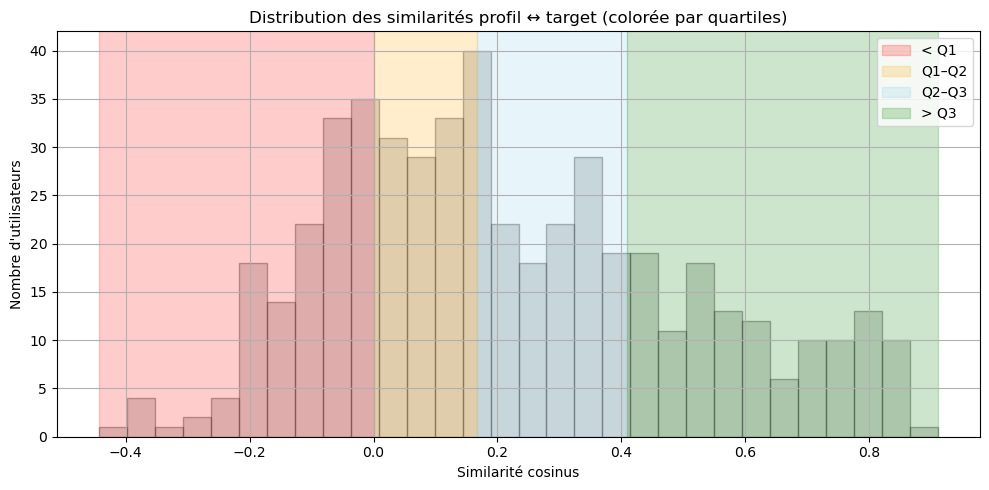

Moyenne des similarités : 0.2191
Médiane : 0.1675


In [30]:
plot_target_similarity_distribution(user_clicks_df, df, embedding_dict, article_ids, article_embeddings)


In [31]:
def plot_score_distribution(scores_df, target_article_id, top_preds=None, score_col="score", title=None):
    """
    Histogramme des scores avec lignes pour :
    - l’article réellement cliqué
    - les top prédictions

    Ajoute :
    - Dégradé de couleurs pour les prédictions
    - Affichage des stats (médiane, score target, etc.)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    score_values = scores_df[score_col].values

    plt.figure(figsize=(10, 6))
    sns.histplot(score_values, bins=100, kde=False, color="steelblue", label="Distribution des scores", alpha=0.6)

    # Lignes : prédictions
    if top_preds is not None:
        top_preds = top_preds.rename(columns={"similarity": "score"})
        for i, row in top_preds.iterrows():
            color = "purple" if i == 0 else "green"
            alpha = 1.0 if i == 0 else 0.5
            label = "Top-1 prédiction" if i == 0 else ("Autres prédictions" if i == 1 else None)
            plt.axvline(row["score"], color=color, linestyle="--", linewidth=2, alpha=alpha, label=label)

    # Ligne : clic réel
    if target_article_id in scores_df["article_id"].values:
        target_score = scores_df.loc[scores_df["article_id"] == target_article_id, score_col].values[0]
        plt.axvline(target_score, color="red", linestyle="-", linewidth=2, label="Clic réel")

        # Calcul du rang du target
        target_rank = (score_values > target_score).sum() + 1
        total = len(score_values)
    else:
        target_score = None
        target_rank = None
        total = None

    # Titre et axes
    plt.title(title or "Distribution des scores du modèle")
    plt.xlabel("Score de similarité")
    plt.ylabel("Nombre d'articles")
    plt.grid(True)

    # Légende unique
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.tight_layout()
    plt.show()

    # Infos supplémentaires
    if target_score is not None:
        print(f"Score de l’article cliqué : {target_score:.4f}")
        print(f"Rang du clic réel : {target_rank} / {total}")
        print(f"Score médian global : {np.median(score_values):.4f}")
        if top_preds is not None:
            print(f"Score moyen top-{len(top_preds)} : {top_preds['score'].mean():.4f}")


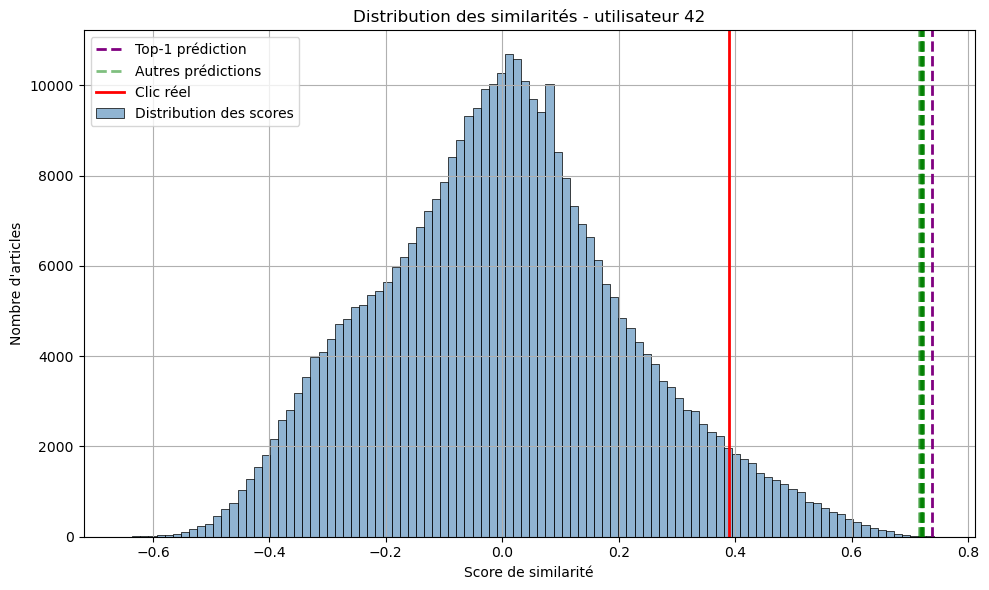

Score de l’article cliqué : 0.3898
Rang du clic réel : 17767 / 364047
Score médian global : -0.0004
Score moyen top-10 : 0.7217


In [32]:
# Exemple avec l'utilisateur choisi
# Étape 1 : Préparer les données utilisateur
selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
    user_clicks_df, embedding_dict, user_id=42
)

# Étape 2 : Calculer les similarités avec tous les articles
from sklearn.metrics.pairwise import cosine_similarity

all_similarities = cosine_similarity(mean_embed, article_embeddings)[0]
scores_df = pd.DataFrame({
    "article_id": article_ids,
    "score": all_similarities
})

# Étape 3 : Obtenir les prédictions du modèle (top-N)
top_preds, _ = predict_topN_articles(
    user_id=42,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    top_n=10
)

top_preds_df = pd.DataFrame(top_preds, columns=["article_id", "similarity"])

# Étape 4 : Visualisation de la distribution des scores
plot_score_distribution(
    scores_df=scores_df,
    target_article_id=target_id,
    top_preds=top_preds_df,
    score_col="score",
    title="Distribution des similarités - utilisateur 42"
)


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull

def plot_tsne_visualization(
    embeddings_df,
    past_article_ids,
    target_article_id,
    top_preds=None,
    mean_embedding=None,
    show_labels=True
):
    """
    Visualisation t-SNE enrichie :
    - clics utilisateur
    - clic réel
    - top-k prédictions
    - vecteur moyen
    - zone d'intérêt (convex hull)
    """

    # Articles à projeter
    articles_to_plot = past_article_ids + [target_article_id]
    if top_preds is not None:
        articles_to_plot += top_preds["article_id"].tolist()

    unique_articles_to_plot = list(dict.fromkeys(articles_to_plot))  # garde l’ordre

    label_map = {aid: "click" for aid in past_article_ids}

    if mean_embedding is not None:
        include_mean = True
    else:
        include_mean = False

    plot_embeddings = embeddings_df.loc[unique_articles_to_plot].copy()

    if include_mean:
        mean_df = pd.DataFrame(mean_embedding, columns=plot_embeddings.columns, index=["mean"])
        plot_embeddings = pd.concat([plot_embeddings, mean_df])
        label_map["mean"] = "mean"

    # Structuration stable
    plot_embeddings = plot_embeddings.reset_index(drop=False).rename(columns={"index": "article_id"})
    plot_embeddings["label"] = plot_embeddings["article_id"].map(label_map).fillna("other")
    plot_embeddings = plot_embeddings.set_index("article_id")

    # t-SNE projection
    tsne_input = plot_embeddings.drop(columns="label").values.astype(np.float32)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(tsne_input)-1), n_iter=1000, init='pca')
    tsne_proj = tsne.fit_transform(tsne_input)

    tsne_df = pd.DataFrame(tsne_proj, index=plot_embeddings.index, columns=["Dim1", "Dim2"])
    tsne_df["label"] = plot_embeddings["label"]

    # Affichage
    plt.figure(figsize=(10, 8))

    # Convex Hull (zone d’intérêt utilisateur)
    click_points = tsne_df[tsne_df["label"] == "click"][["Dim1", "Dim2"]].values
    if len(click_points) >= 3:
        hull = ConvexHull(click_points)
        for simplex in hull.simplices:
            plt.plot(click_points[simplex, 0], click_points[simplex, 1], 'gray', linestyle="--", alpha=0.5)

    # Scatter enrichi
    for idx, row in tsne_df.iterrows():
        label = row["label"]
        if label == "mean":
            plt.scatter(row["Dim1"], row["Dim2"], color="green", s=160, marker="X", label="Vecteur moyen")
        elif idx == target_article_id:
            plt.scatter(row["Dim1"], row["Dim2"], color="red", s=160, marker="D", label="Clic réel")
            if show_labels:
                plt.text(row["Dim1"] + 1, row["Dim2"], f"target {idx}", fontsize=9, color="red")
        elif top_preds is not None and idx in top_preds["article_id"].values:
            if idx == top_preds.iloc[0]["article_id"]:
                plt.scatter(row["Dim1"], row["Dim2"], color="purple", s=140, marker="*", label="Top-1 prédiction")
                if show_labels:
                    plt.text(row["Dim1"] + 1, row["Dim2"], f"top-1 {idx}", fontsize=9, color="purple")
            else:
                plt.scatter(row["Dim1"], row["Dim2"], color="lightgreen", s=120, marker="P", label="Autre prédiction")
        elif label == "click":
            plt.scatter(row["Dim1"], row["Dim2"], color="orange", s=90, alpha=0.8, marker="o", label="Clic utilisateur")
        else:
            plt.scatter(row["Dim1"], row["Dim2"], color="gray", s=60, alpha=0.4)

    # Légende sans doublon
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize=9)

    plt.title("t-SNE des préférences utilisateur & recommandations", fontsize=14)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


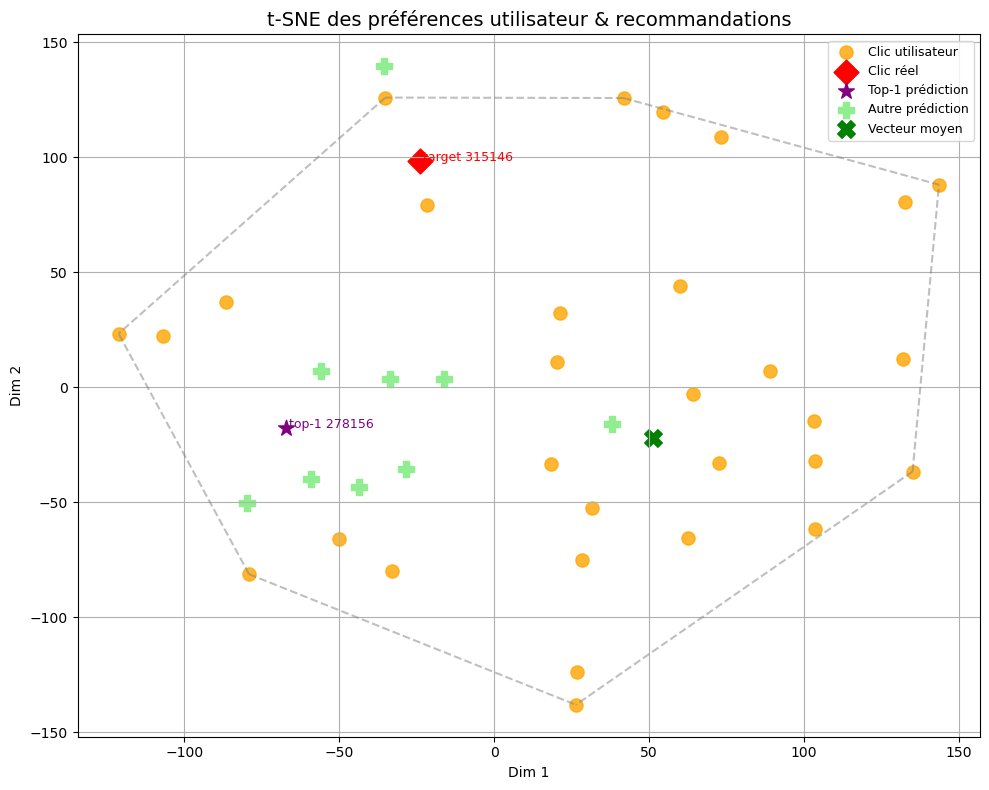

In [34]:
plot_tsne_visualization(
    embeddings_df=embeddings_df,
    past_article_ids=past_ids,
    target_article_id=target_id,
    top_preds=top_preds_df,
    mean_embedding=mean_embed
)


## Visualisation pour un utilisateur au hasard

In [35]:
def analyze_user_recommendation(
    user_clicks_df,
    df,
    embeddings_df,
    embedding_dict,
    article_ids,
    article_embeddings,
    df_articles,
    user_id=None,
    top_n=5,
    alpha=0.9,
    debug=True
):
    """
    Fonction complète d’analyse et de visualisation :
    - Sélection d’un utilisateur (ou aléatoire)
    - Calcul des similarités
    - Génération des recommandations
    - Visualisation heatmap + histogramme + t-SNE

    Paramètres :
    - user_clicks_df : DataFrame pré-agrégée avec clicked_article_ids
    - df : DataFrame des clics (avec created_at_ts)
    - embeddings_df : DataFrame indexé par article_id
    - embedding_dict : dictionnaire article_id → embedding numpy
    - article_ids : np.array des articles
    - article_embeddings : np.array des embeddings
    - user_id : (optionnel) utilisateur ciblé
    - top_n : nombre de recommandations
    - debug : affiche les infos utilisateur

    Fonction enrichie : recommandations avec score combiné (similarité + popularité)
    - alpha : importance de la similarité (entre 0 et 1)
    """

    import matplotlib.pyplot as plt
    from sklearn.metrics.pairwise import cosine_similarity
    import pandas as pd

    # 1. Sélection utilisateur + données
    selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=debug
    )

    # 2. Calcul des scores combinés
    combined_scores = compute_combined_score(
        user_vector=mean_embed.flatten(),
        article_embeddings_df=embeddings_df,
        df_articles=df_articles,
        alpha=alpha
    )

    scores_df = pd.DataFrame({
        "article_id": embeddings_df.index,
        "score": combined_scores
    })

    # 3. Recommandations top-N
    top_preds_df = scores_df.sort_values(by="score", ascending=False).head(top_n).reset_index(drop=True)

    # 4. Visualisation heatmap
    print("\n📊 Heatmap des similarités :")
    plot_similarity_heatmap(
        mean_embedding=mean_embed,
        embedding_dict=embedding_dict,
        past_article_ids=past_ids,
        target_article_id=target_id,
        recommended_ids=top_preds_df["article_id"].tolist(),
        title=f"User {selected_user} - Score combiné (α={alpha})"
    )

    # 5. Histogramme des scores
    from copy import deepcopy
    _top_preds_df = deepcopy(top_preds_df)
    print("\n📉 Histogramme des scores :")
    plot_score_distribution(
        scores_df=scores_df,
        target_article_id=target_id,
        top_preds=_top_preds_df.rename(columns={"score": "similarity"}),
        score_col="score",
        title="Distribution des scores combinés"
    )

    # 6. Projection t-SNE
    print("\n🧭 Projection t-SNE :")
    plot_tsne_visualization(
        embeddings_df=embeddings_df,
        past_article_ids=past_ids,
        target_article_id=target_id,
        top_preds=top_preds_df,
        mean_embedding=mean_embed,
        show_labels=True
    )


Utilisateur sélectionné : 42
Nombre total de clics : 31
Article cible : 315146
Articles précédents : [145166, 284346, 157861, 75825, 107216, 313996, 285331, 336380, 129434, 225019, 208518, 119193, 226595, 71608, 336221, 226648, 352902, 288457, 336220, 353673, 235854, 284178, 292749, 285414, 119534, 9126, 331116, 158541, 292594, 218028]

📊 Heatmap des similarités :


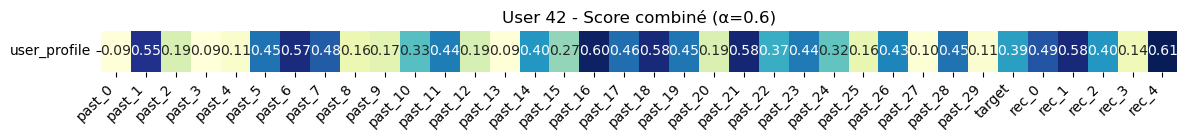


📉 Histogramme des scores :


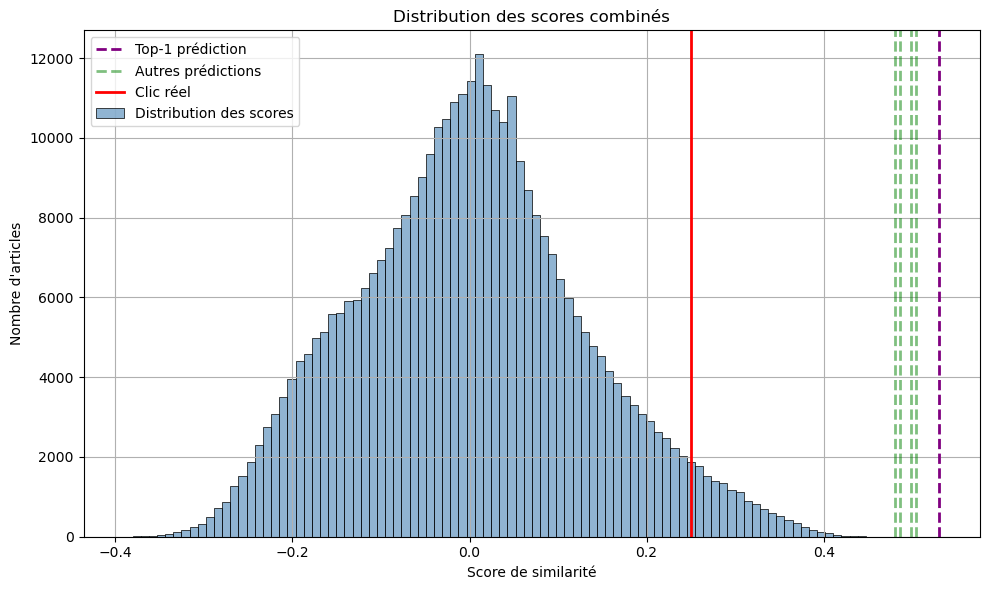

Score de l’article cliqué : 0.2499
Rang du clic réel : 14354 / 364047
Score médian global : -0.0002
Score moyen top-5 : 0.4997

🧭 Projection t-SNE :


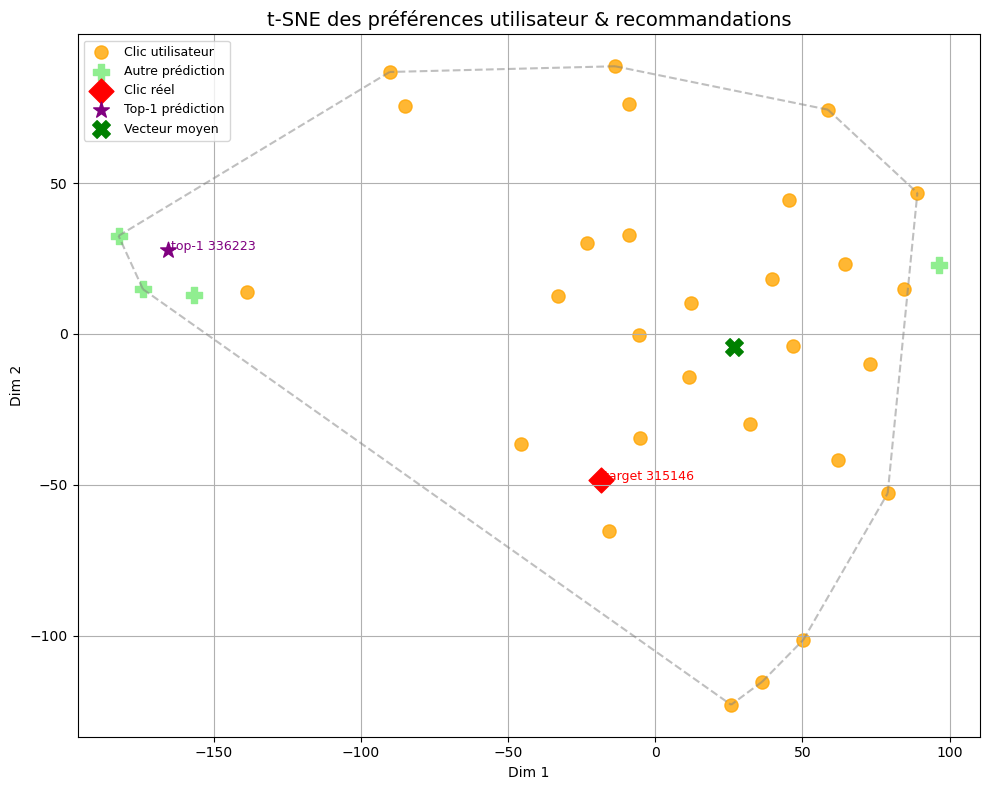

In [36]:
analyze_user_recommendation(
    user_clicks_df=user_clicks_df,
    df=df,
    embeddings_df=embeddings_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    df_articles=df_articles, # pour la colonne avec la popularité
    alpha=0.6, # importance de la similarité cosine / popularité
    user_id=42 # ou None
)


In [37]:
def analyze_user_recommendation_recency(
    user_clicks_df,
    df,
    embeddings_df,
    embedding_dict,
    article_ids,
    article_embeddings,
    user_id=None,
    top_n=5,
    debug=True,
    alpha=0.9,
    beta=1.0
):
    """
    Fonction complète d’analyse et de visualisation avec pondération temporelle :
    - Sélection d’un utilisateur (ou aléatoire)
    - Calcul des similarités pondérées par la récence
    - Génération des recommandations
    - Visualisation heatmap + histogramme + t-SNE

    Paramètres :
    - user_clicks_df : DataFrame pré-agrégée avec clicked_article_ids
    - df : DataFrame des clics (avec created_at_ts)
    - embeddings_df : DataFrame indexé par article_id
    - embedding_dict : dictionnaire article_id → embedding numpy
    - article_ids : np.array des articles
    - article_embeddings : np.array des embeddings
    - user_id : (optionnel) utilisateur ciblé
    - top_n : nombre de recommandations
    - debug : affiche les infos utilisateur
    - alpha : pondération temporelle des clics
    - beta : pondération temporelle des articles recommandés
    """

    import matplotlib.pyplot as plt
    import pandas as pd

    # 1. Sélection utilisateur + données
    selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=debug
    )

    # 2. Recommandations avec pondération temporelle
    top_preds, _ = predict_topN_weighted_by_recency(
        user_id=selected_user,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        alpha=alpha,
        beta=beta,
        top_n=top_n
    )
    top_preds_df = pd.DataFrame(top_preds, columns=["article_id", "score"])

    # 3. Similarités avec tous les articles pour histogramme
    from sklearn.metrics.pairwise import cosine_similarity
    all_similarities = cosine_similarity(mean_embed, article_embeddings)[0]
    scores_df = pd.DataFrame({
        "article_id": article_ids,
        "score": all_similarities
    })

    # 4. Visualisation heatmap (affiche dans son propre plt.figure)
    print("\n📊 Heatmap des similarités :")
    plot_similarity_heatmap(
        mean_embedding=mean_embed,
        embedding_dict=embedding_dict,
        past_article_ids=past_ids,
        target_article_id=target_id,
        recommended_ids=top_preds_df["article_id"].tolist(),
        title=f"User {selected_user} - Similarités avec le profil (pondéré)"
    )

    # 5. Affichage séparé pour histogramme
    from copy import deepcopy
    _top_preds_df = deepcopy(top_preds_df)
    print("\n📉 Histogramme des scores :")
    plot_score_distribution(
        scores_df=scores_df,
        target_article_id=target_id,
        top_preds=_top_preds_df.rename(columns={"score": "similarity"}),
        score_col="score",
        title="Distribution des scores du modèle (non pondéré)"
    )

    # 6. Affichage séparé pour t-SNE
    print("\n🧭 Projection t-SNE :")
    plot_tsne_visualization(
        embeddings_df=embeddings_df,
        past_article_ids=past_ids,
        target_article_id=target_id,
        top_preds=top_preds_df,
        mean_embedding=mean_embed,
        show_labels=True
    )


Utilisateur sélectionné : 10307
Nombre total de clics : 8
Article cible : 63672
Articles précédents : [63756, 63683, 70646, 272143, 63759, 63691, 63746]

📊 Heatmap des similarités :


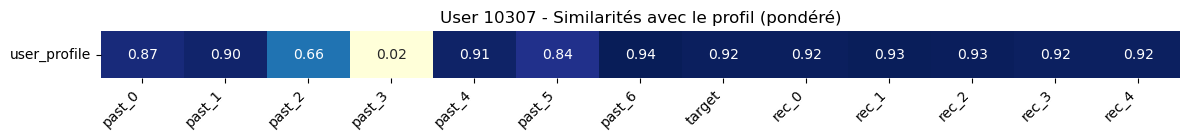


📉 Histogramme des scores :


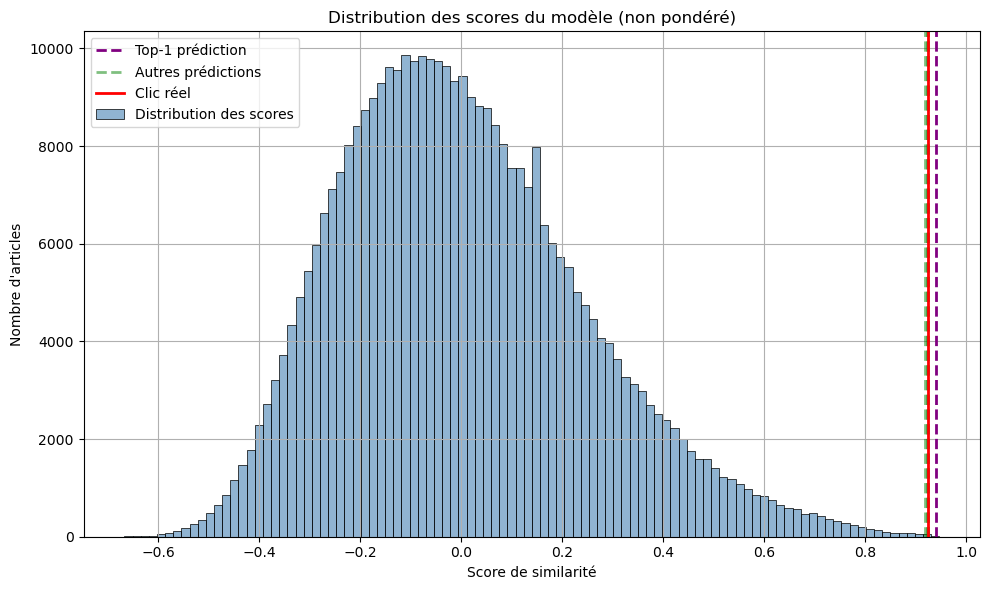

Score de l’article cliqué : 0.9244
Rang du clic réel : 23 / 364047
Score médian global : -0.0228
Score moyen top-5 : 0.9259

🧭 Projection t-SNE :


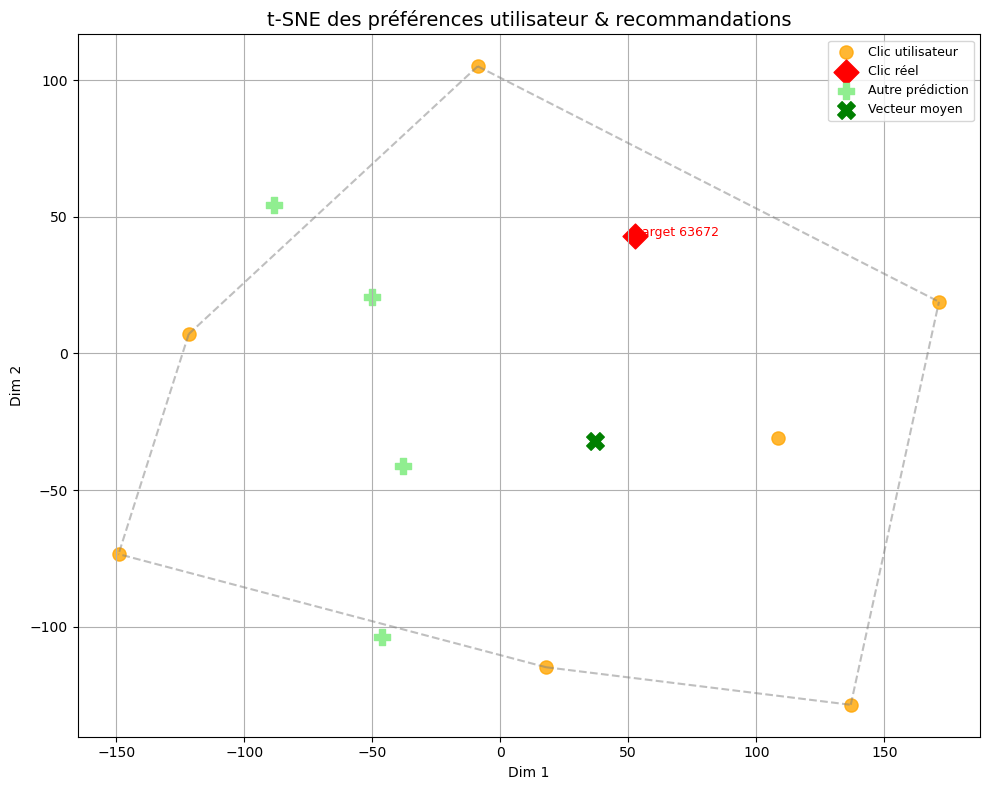

In [38]:
analyze_user_recommendation_recency(
    user_clicks_df=user_clicks_df,
    df=df,
    embeddings_df=embeddings_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    user_id=10307,   # article avec hit !
    top_n=5,
    alpha=0.85,
    beta=1.2
)


# Métriques pour un échantillon d'utilisateurs

🎯 Jeu de métriques recommandé<br>
| Nom              | Type       | Comparabilité                   | Explication                                                                                                                           |
| ---------------- | ---------- | ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Hit\@k**       | Binaire    | ✅ Facilement applicable partout | Est-ce qu’au moins un item pertinent est dans le top-k ? (utile pour systèmes implicites comme `implicit`, LightFM, etc.)             |
| **Precision\@k** | Proportion | ✅ Pour tous                     | Combien d'articles recommandés sont vraiment pertinents ?                                                                             |
| **Recall\@k**    | Proportion | ⚠️ Plus difficile pour Surprise | Combien des articles pertinents ai-je retrouvés ? Nécessite de connaître **tous les bons articles par user**, parfois non disponible. |
| **MAP\@k**       | Ordonnée   | ✅ Partout                       | Moyenne des précisions à chaque position pertinente (utilisée dans implicit, LightFM)                                                 |
| **NDCG\@k**      | Ordonnée   | ✅ Partout                       | Prend en compte l’ordre des recommandations, très utile pour tester les modèles pondérés                                              |<br>

🔁 Mise en œuvre pratique<br>
| Métrique     | Content-Based                                | Surprise                                   | Implicit | LightFM |
| ------------ | -------------------------------------------- | ------------------------------------------ | -------- | ------- |
| Hit\@k       | ✅ Facile à calculer                          | ✅ Possible (avec transformation implicite) | ✅ Natif  | ✅ Natif |
| Precision\@k | ✅                                            | ✅                                          | ✅        | ✅       |
| Recall\@k    | ⚠️ (ok si tu connais tous les bons articles) | ⚠️ (rarement bien défini)                  | ✅        | ✅       |
| MAP\@k       | ✅                                            | ⚠️ (non natif)                             | ✅ Natif  | ✅ Natif |
| NDCG\@k      | ✅                                            | ⚠️ (non natif)                             | ✅ Natif  | ✅ Natif |<br>


In [39]:
def evaluate_prediction_functions(
    user_clicks_df,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    predict_functions,
    k=5,
    n_users=100,
    seed=42,
    approche="content-based",
    save_csv=True,
    results_path="./results/eval_results.csv"
):
    import numpy as np
    import pandas as pd
    from sklearn.metrics import ndcg_score
    from tqdm import tqdm
    import os

    np.random.seed(seed)
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    sampled_users = all_users if n_users is None else np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    results = {name: {"hit@k": [], "map@k": [], "ndcg@k": [], "precision@k": [], "recall@k": []} for name in predict_functions.keys()}
    hit_users = {name: [] for name in predict_functions.keys()}

    for user_id in tqdm(sampled_users, desc="Évaluation des modèles"):
        for name, predict_func in predict_functions.items():
            try:
                top_preds, target = predict_func(user_id, df, embedding_dict, article_ids, article_embeddings)
                if top_preds is None or target is None:
                    continue

                top_ids = [aid for aid, _ in top_preds[:k]]

                # Hit@k
                hit = int(target in top_ids)
                if hit:
                    print(f"✅ HIT trouvé pour user {user_id} avec le modèle '{name}' (target: {target})")
                    hit_users[name].append(user_id)

                # MAP@k
                map_k = 0.0
                for i, aid in enumerate(top_ids):
                    if aid == target:
                        map_k = 1.0 / (i + 1)
                        break

                # NDCG@k
                relevance = [1 if aid == target else 0 for aid in top_ids]
                ndcg = ndcg_score([relevance], [list(reversed(range(len(relevance))))])

                # Precision@k et Recall@k
                user_clicks = user_clicks_df[user_clicks_df['user_id'] == user_id]['clicked_article_ids'].iloc[0]
                true_positives = sum([1 for aid in top_ids if aid in user_clicks])
                total_relevant = len(user_clicks)

                precision_k = true_positives / k
                recall_k = true_positives / total_relevant if total_relevant > 0 else 0.0

                # Enregistrement
                results[name]["hit@k"].append(hit)
                results[name]["map@k"].append(map_k)
                results[name]["ndcg@k"].append(ndcg)
                results[name]["precision@k"].append(precision_k)
                results[name]["recall@k"].append(recall_k)

            except Exception as e:
                print(f"Erreur dans {name} pour user {user_id} : {e}")

    summary = []
    for name, scores in results.items():
        summary.append({
            "modèle": name,
            "approche": approche,
            "n_users": len(sampled_users),
            f"Hit@{k}": np.mean(scores["hit@k"]),
            f"MAP@{k}": np.mean(scores["map@k"]),
            f"NDCG@{k}": np.mean(scores["ndcg@k"]),
            f"Precision@{k}": np.mean(scores["precision@k"]),
            f"Recall@{k}": np.mean(scores["recall@k"])
        })

    summary_df = pd.DataFrame(summary).sort_values(f"Hit@{k}", ascending=False)

    if save_csv:
        os.makedirs(os.path.dirname(results_path), exist_ok=True)
        if os.path.exists(results_path):
            existing_df = pd.read_csv(results_path)
            summary_df = pd.concat([existing_df, summary_df], ignore_index=True)
        summary_df.to_csv(results_path, index=False)

    return summary_df, hit_users


## Embeddings sur un échantillon d'utilisateurs

In [40]:
from joblib import Parallel, delayed

# nombre de prédictions
k = 5
predict_functions = {
    "Non pondéré": lambda uid, df, emb_dict, ids, embs: predict_topN_articles(
        uid, df, emb_dict, ids, embs, top_n=k),
    "Pondéré récence": lambda uid, df, emb_dict, ids, embs: predict_topN_weighted_by_recency(
        uid, df, emb_dict, ids, embs, alpha=0.9, beta=1.0, top_n=k),
    "Clic aléatoire": lambda uid, df, emb_dict, ids, embs: predict_random_target(
        uid, df, emb_dict, ids, embs, top_n=k, seed=42),
    "Clic aléatoire pondéré": lambda uid, df, emb_dict, ids, embs: predict_random_target_weighted(
        uid, df, emb_dict, ids, embs, top_n=k, alpha=0.9, beta=1.0, seed=42)
}

results_df, hit_users = evaluate_prediction_functions(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    predict_functions=predict_functions,
    k=k,
    n_users=1000,
    seed=42,
    approche="content-based",
    save_csv=True,
    results_path="./results/eval_results.csv"
)


Évaluation des modèles:   5%|▌         | 53/1000 [00:56<16:58,  1.08s/it]

✅ HIT trouvé pour user 26590 avec le modèle 'Clic aléatoire pondéré' (target: 72334)


Évaluation des modèles:  10%|█         | 105/1000 [01:52<16:18,  1.09s/it]

✅ HIT trouvé pour user 87373 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  14%|█▎        | 137/1000 [02:28<16:07,  1.12s/it]

✅ HIT trouvé pour user 149520 avec le modèle 'Clic aléatoire pondéré' (target: 161602)


Évaluation des modèles:  15%|█▌        | 154/1000 [02:46<15:08,  1.07s/it]

✅ HIT trouvé pour user 227294 avec le modèle 'Pondéré récence' (target: 128551)


Évaluation des modèles:  16%|█▌        | 157/1000 [02:49<15:07,  1.08s/it]

✅ HIT trouvé pour user 46708 avec le modèle 'Clic aléatoire pondéré' (target: 50715)


Évaluation des modèles:  16%|█▌        | 161/1000 [02:54<15:03,  1.08s/it]

✅ HIT trouvé pour user 283101 avec le modèle 'Pondéré récence' (target: 353673)


Évaluation des modèles:  20%|██        | 203/1000 [03:39<14:19,  1.08s/it]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire pondéré' (target: 160132)


Évaluation des modèles:  25%|██▍       | 248/1000 [04:28<13:42,  1.09s/it]

✅ HIT trouvé pour user 322362 avec le modèle 'Clic aléatoire pondéré' (target: 111738)


Évaluation des modèles:  25%|██▌       | 252/1000 [04:33<13:33,  1.09s/it]

✅ HIT trouvé pour user 290575 avec le modèle 'Pondéré récence' (target: 333150)


Évaluation des modèles:  25%|██▌       | 253/1000 [04:34<13:28,  1.08s/it]

✅ HIT trouvé pour user 290575 avec le modèle 'Clic aléatoire pondéré' (target: 336245)


Évaluation des modèles:  39%|███▉      | 389/1000 [07:03<11:20,  1.11s/it]

✅ HIT trouvé pour user 150176 avec le modèle 'Clic aléatoire pondéré' (target: 207994)


Évaluation des modèles:  43%|████▎     | 432/1000 [07:50<10:17,  1.09s/it]

✅ HIT trouvé pour user 92446 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Pondéré récence' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  43%|████▎     | 433/1000 [07:51<10:21,  1.10s/it]

✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  72%|███████▏  | 721/1000 [13:08<05:05,  1.10s/it]

✅ HIT trouvé pour user 243097 avec le modèle 'Non pondéré' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Pondéré récence' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire' (target: 124350)


Évaluation des modèles:  72%|███████▏  | 722/1000 [13:09<05:04,  1.10s/it]

✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire pondéré' (target: 124350)


Évaluation des modèles:  74%|███████▍  | 738/1000 [13:27<04:46,  1.09s/it]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire' (target: 124352)


Évaluation des modèles:  74%|███████▍  | 739/1000 [13:28<04:49,  1.11s/it]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire pondéré' (target: 124352)


Évaluation des modèles:  75%|███████▍  | 749/1000 [13:39<04:31,  1.08s/it]

✅ HIT trouvé pour user 301618 avec le modèle 'Clic aléatoire pondéré' (target: 60009)


Évaluation des modèles:  77%|███████▋  | 768/1000 [14:00<04:23,  1.14s/it]

✅ HIT trouvé pour user 69606 avec le modèle 'Pondéré récence' (target: 50917)


Évaluation des modèles:  77%|███████▋  | 769/1000 [14:01<04:21,  1.13s/it]

✅ HIT trouvé pour user 69606 avec le modèle 'Clic aléatoire pondéré' (target: 50918)


Évaluation des modèles:  78%|███████▊  | 778/1000 [14:11<04:11,  1.13s/it]

✅ HIT trouvé pour user 65344 avec le modèle 'Clic aléatoire pondéré' (target: 32467)


Évaluation des modèles:  85%|████████▌ | 850/1000 [15:30<02:42,  1.08s/it]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  86%|████████▋ | 864/1000 [15:45<02:28,  1.09s/it]

✅ HIT trouvé pour user 24155 avec le modèle 'Clic aléatoire pondéré' (target: 123757)


Évaluation des modèles:  88%|████████▊ | 879/1000 [16:02<02:11,  1.08s/it]

✅ HIT trouvé pour user 85152 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  88%|████████▊ | 882/1000 [16:05<02:07,  1.08s/it]

✅ HIT trouvé pour user 292624 avec le modèle 'Clic aléatoire pondéré' (target: 208150)


Évaluation des modèles:  91%|█████████ | 911/1000 [16:37<01:36,  1.09s/it]

✅ HIT trouvé pour user 47702 avec le modèle 'Pondéré récence' (target: 57616)


Évaluation des modèles:  94%|█████████▍| 943/1000 [17:12<01:01,  1.08s/it]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  98%|█████████▊| 977/1000 [17:49<00:24,  1.08s/it]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  99%|█████████▉| 992/1000 [18:06<00:09,  1.17s/it]

✅ HIT trouvé pour user 29425 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles: 100%|█████████▉| 999/1000 [18:14<00:01,  1.14s/it]

✅ HIT trouvé pour user 278204 avec le modèle 'Clic aléatoire pondéré' (target: 50289)


Évaluation des modèles: 100%|██████████| 1000/1000 [18:15<00:00,  1.10s/it]


In [44]:
print(results_df.round(4))  # pour limiter à 4 décimales
print("Nombre total de hits (Clic aléatoire pondéré):", len(hit_users["Clic aléatoire pondéré"]))

                   modèle       approche  n_users  Hit@5   MAP@5  NDCG@5  \
3  Clic aléatoire pondéré  content-based     1000  0.019  0.0077  0.0105   
1         Pondéré récence  content-based     1000  0.010  0.0064  0.0073   
2          Clic aléatoire  content-based     1000  0.003  0.0018  0.0021   
0             Non pondéré  content-based     1000  0.002  0.0020  0.0020   

   Precision@5  Recall@5  
3       0.0038    0.0066  
1       0.0020    0.0038  
2       0.0006    0.0007  
0       0.0004    0.0005  
Nombre total de hits (Clic aléatoire pondéré): 19


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_recommendation_results(results_df, approche=None):
    """
    Affiche un graphique comparatif des résultats de recommandation pour chaque modèle.
    
    Paramètres :
    - results_df : DataFrame des résultats avec colonnes 'modèle', métriques, et 'approche'
    - approche (str, optionnel) : si spécifiée, filtre le DataFrame avant affichage
    """
    if approche:
        results_df = results_df[results_df["approche"] == approche]

    if results_df.empty:
        print(f"Aucune donnée à afficher pour l’approche : {approche}")
        return

    approche_unique = results_df['approche'].unique()
    if len(approche_unique) == 1:
        titre = f"Comparaison des performances des modèles ({approche_unique[0]})"
    else:
        titre = "Comparaison des performances des modèles (plusieurs approches)"

    metric_cols = [col for col in results_df.columns if col.startswith(("Hit@", "MAP@", "NDCG@", "Precision@", "Recall@"))]

    melted_df = results_df.melt(id_vars="modèle", value_vars=metric_cols, var_name="Métrique", value_name="Score")

    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x="modèle", y="Score", hue="Métrique")
    plt.title(titre)
    plt.ylabel("Score moyen")
    plt.xlabel("Modèle")
    plt.xticks(rotation=15, ha='right')
    plt.legend(title="Métrique", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


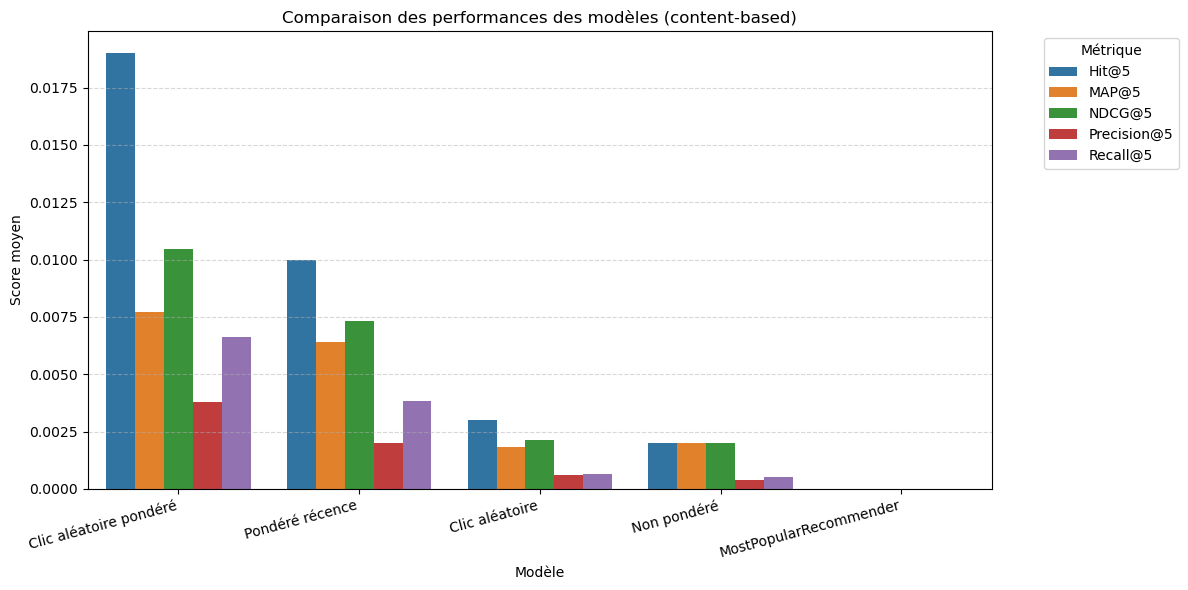

In [64]:
import pandas as pd

# Charger le CSV
results = pd.read_csv("./results/eval_results.csv")

# Affichage graphique
plot_recommendation_results(results, approche="content-based")


<i>MostPolular, RandomRecommender, MostRecentRecommender : tous donnent 0 !

## Embeddings restreint aux articles disponibles pendant la période d'observation

✅ Changement de contexte <br>

On conserve dans embeddings_df tous les articles publiés avant la fin de la période d’observation

Peu importe qu’ils aient été cliqués ou non,

Il faut simplement que leur created_at_ts ≤ max(session_start) <b>+ 86400 (un jour)</b>

In [68]:
# 1. Définir la limite temporelle : 1 jour après la dernière session observée
one_day_seconds = 86400
limite_ts = df["session_start"].max() + one_day_seconds

# 2. Sélectionner les article_id dont la date de publication est antérieure à cette limite
articles_disponibles = df_articles[df_articles["created_at_ts"] <= limite_ts]["article_id"].values

# 3. Filtrer embeddings_df sur ces articles
embeddings_df_restreint = embeddings_df.loc[embeddings_df.index.intersection(articles_disponibles)]

# 4. Mettre à jour les objets associés
article_ids = embeddings_df_restreint.index.to_numpy()
article_embeddings = embeddings_df_restreint.to_numpy()
embedding_dict = dict(zip(article_ids, article_embeddings))

# 5. (optionnel) Afficher le nombre d’articles conservés
print(f"{len(article_ids)} articles conservés sur {len(embeddings_df)} après filtrage temporel.")


257217 articles conservés sur 364047 après filtrage temporel.


In [70]:
results_df_time_limited, hit_users_time_limited = evaluate_prediction_functions(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,             # <-- mis à jour
    article_ids=article_ids,                   # <-- mis à jour
    article_embeddings=article_embeddings,     # <-- mis à jour
    predict_functions=predict_functions,
    k=5,
    n_users=1000,  # si None tous les utilisateurs sont calculés
    approche='content-based articles dispo',
)

Évaluation des modèles:   5%|▌         | 53/1000 [00:42<13:06,  1.20it/s]

✅ HIT trouvé pour user 26590 avec le modèle 'Clic aléatoire pondéré' (target: 72334)


Évaluation des modèles:  10%|█         | 105/1000 [01:25<13:06,  1.14it/s]

✅ HIT trouvé pour user 87373 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 87373 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  14%|█▎        | 137/1000 [01:52<11:37,  1.24it/s]

✅ HIT trouvé pour user 149520 avec le modèle 'Clic aléatoire pondéré' (target: 161602)


Évaluation des modèles:  15%|█▌        | 154/1000 [02:06<11:45,  1.20it/s]

✅ HIT trouvé pour user 227294 avec le modèle 'Pondéré récence' (target: 128551)


Évaluation des modèles:  16%|█▌        | 157/1000 [02:08<11:32,  1.22it/s]

✅ HIT trouvé pour user 46708 avec le modèle 'Clic aléatoire pondéré' (target: 50715)


Évaluation des modèles:  16%|█▌        | 161/1000 [02:11<11:31,  1.21it/s]

✅ HIT trouvé pour user 283101 avec le modèle 'Pondéré récence' (target: 353673)


Évaluation des modèles:  20%|██        | 202/1000 [02:45<11:01,  1.21it/s]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire' (target: 160132)


Évaluation des modèles:  20%|██        | 203/1000 [02:46<10:59,  1.21it/s]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire pondéré' (target: 160132)


Évaluation des modèles:  25%|██▍       | 247/1000 [03:22<10:12,  1.23it/s]

✅ HIT trouvé pour user 322362 avec le modèle 'Pondéré récence' (target: 111663)


Évaluation des modèles:  25%|██▍       | 248/1000 [03:23<10:09,  1.23it/s]

✅ HIT trouvé pour user 322362 avec le modèle 'Clic aléatoire pondéré' (target: 111738)


Évaluation des modèles:  25%|██▌       | 252/1000 [03:26<10:20,  1.21it/s]

✅ HIT trouvé pour user 290575 avec le modèle 'Pondéré récence' (target: 333150)


Évaluation des modèles:  25%|██▌       | 253/1000 [03:27<10:20,  1.20it/s]

✅ HIT trouvé pour user 290575 avec le modèle 'Clic aléatoire pondéré' (target: 336245)


Évaluation des modèles:  39%|███▉      | 389/1000 [05:19<08:19,  1.22it/s]

✅ HIT trouvé pour user 150176 avec le modèle 'Clic aléatoire pondéré' (target: 207994)


Évaluation des modèles:  43%|████▎     | 432/1000 [05:54<07:31,  1.26it/s]

✅ HIT trouvé pour user 92446 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Pondéré récence' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  43%|████▎     | 433/1000 [05:54<07:32,  1.25it/s]

✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  72%|███████▏  | 721/1000 [09:46<03:42,  1.25it/s]

✅ HIT trouvé pour user 243097 avec le modèle 'Non pondéré' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Pondéré récence' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire' (target: 124350)


Évaluation des modèles:  72%|███████▏  | 722/1000 [09:46<03:44,  1.24it/s]

✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire pondéré' (target: 124350)


Évaluation des modèles:  74%|███████▍  | 738/1000 [09:59<03:28,  1.26it/s]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire' (target: 124352)


Évaluation des modèles:  74%|███████▍  | 739/1000 [10:00<03:28,  1.25it/s]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire pondéré' (target: 124352)


Évaluation des modèles:  75%|███████▍  | 749/1000 [10:08<03:20,  1.25it/s]

✅ HIT trouvé pour user 301618 avec le modèle 'Clic aléatoire pondéré' (target: 60009)


Évaluation des modèles:  77%|███████▋  | 768/1000 [10:23<03:04,  1.26it/s]

✅ HIT trouvé pour user 69606 avec le modèle 'Pondéré récence' (target: 50917)


Évaluation des modèles:  77%|███████▋  | 769/1000 [10:24<03:04,  1.25it/s]

✅ HIT trouvé pour user 69606 avec le modèle 'Clic aléatoire pondéré' (target: 50918)


Évaluation des modèles:  78%|███████▊  | 778/1000 [10:31<02:56,  1.26it/s]

✅ HIT trouvé pour user 65344 avec le modèle 'Clic aléatoire pondéré' (target: 32467)


Évaluation des modèles:  85%|████████▍ | 849/1000 [11:28<02:01,  1.25it/s]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  85%|████████▌ | 850/1000 [11:29<01:59,  1.25it/s]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  86%|████████▋ | 864/1000 [11:40<01:49,  1.25it/s]

✅ HIT trouvé pour user 24155 avec le modèle 'Clic aléatoire pondéré' (target: 123757)


Évaluation des modèles:  88%|████████▊ | 879/1000 [11:52<01:36,  1.25it/s]

✅ HIT trouvé pour user 85152 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 85152 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  88%|████████▊ | 882/1000 [11:54<01:33,  1.26it/s]

✅ HIT trouvé pour user 292624 avec le modèle 'Clic aléatoire pondéré' (target: 208150)


Évaluation des modèles:  91%|█████████ | 911/1000 [12:18<01:11,  1.24it/s]

✅ HIT trouvé pour user 47702 avec le modèle 'Pondéré récence' (target: 57616)


Évaluation des modèles:  94%|█████████▍| 942/1000 [12:43<00:47,  1.21it/s]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  94%|█████████▍| 943/1000 [12:43<00:46,  1.22it/s]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  95%|█████████▍| 948/1000 [12:48<00:43,  1.21it/s]

✅ HIT trouvé pour user 226576 avec le modèle 'Pondéré récence' (target: 209348)


Évaluation des modèles:  98%|█████████▊| 976/1000 [13:10<00:19,  1.24it/s]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  98%|█████████▊| 977/1000 [13:11<00:18,  1.24it/s]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  99%|█████████▉| 992/1000 [13:23<00:06,  1.23it/s]

✅ HIT trouvé pour user 29425 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 29425 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles: 100%|█████████▉| 999/1000 [13:29<00:00,  1.25it/s]

✅ HIT trouvé pour user 278204 avec le modèle 'Clic aléatoire pondéré' (target: 50289)


Évaluation des modèles: 100%|██████████| 1000/1000 [13:29<00:00,  1.23it/s]


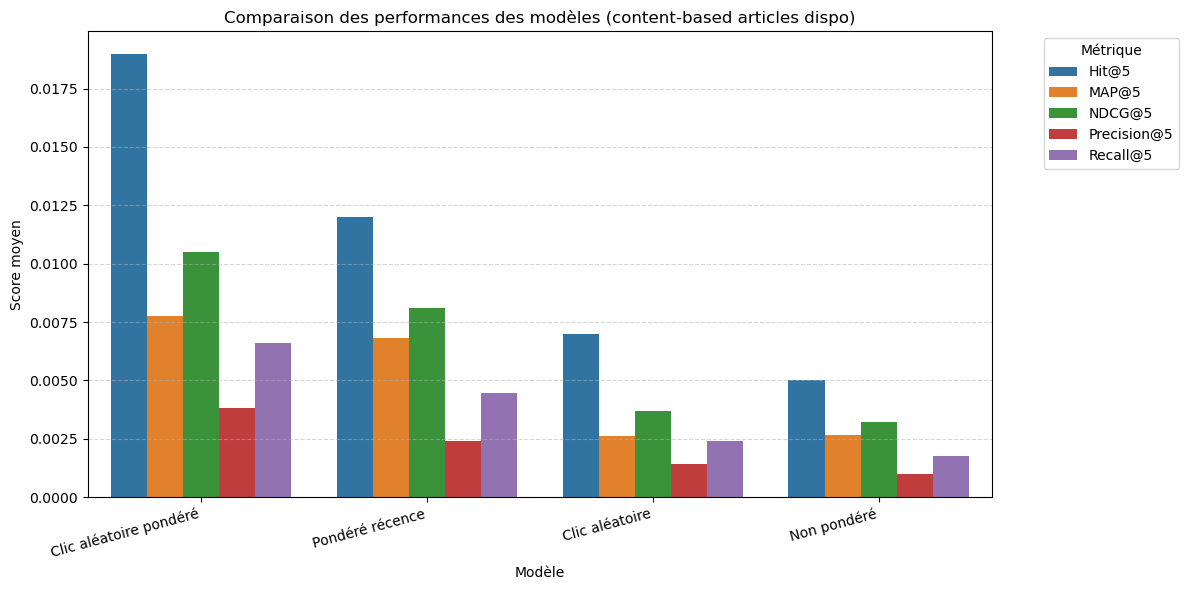

In [73]:
plot_recommendation_results(results_df_time_limited, approche="content-based articles dispo")

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_comparative_results_from_csv(
    csv_path="./results/eval_results.csv",
    approches=("content-based", "content-based articles dispo"),
    suffixes=("Sans filtre", "Avec filtre")
):
    """
    Charge les résultats depuis un CSV et affiche une comparaison entre deux approches données.
    
    Paramètres :
    - csv_path : chemin vers le fichier de résultats
    - approches : tuple des deux valeurs de la colonne 'approche' à comparer
    - suffixes : labels affichés dans la légende du graphique
    """
    # Charger les données
    df = pd.read_csv(csv_path)

    # Filtrer les deux approches
    df_full = df[df["approche"] == approches[0]].copy()
    df_full["Contexte"] = suffixes[0]

    df_limited = df[df["approche"] == approches[1]].copy()
    df_limited["Contexte"] = suffixes[1]

    # Exclure MostPopularRecommender
    df_full = df_full[df_full["modèle"] != "MostPopularRecommender"]
    df_limited = df_limited[df_limited["modèle"] != "MostPopularRecommender"]

    # Fusionner
    df_all = pd.concat([df_full, df_limited], axis=0)

    # Transformation au format long
    metric_cols = [col for col in df_all.columns if col.startswith(("Hit@", "MAP@", "NDCG@", "Precision@", "Recall@"))]
    df_long = df_all.melt(id_vars=["modèle", "Contexte"], value_vars=metric_cols,
                          var_name="Métrique", value_name="Score")

    # Tracé
    g = sns.catplot(
        data=df_long,
        x="modèle",
        y="Score",
        hue="Contexte",
        col="Métrique",
        kind="bar",
        palette="Set2",
        height=4,
        aspect=1.3,
        sharey=False
    )

    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle("Comparaison des performances avec/sans filtrage temporel", fontsize=14)
    g.set_xticklabels(rotation=15, ha='right')
    for ax in g.axes.flat:
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()


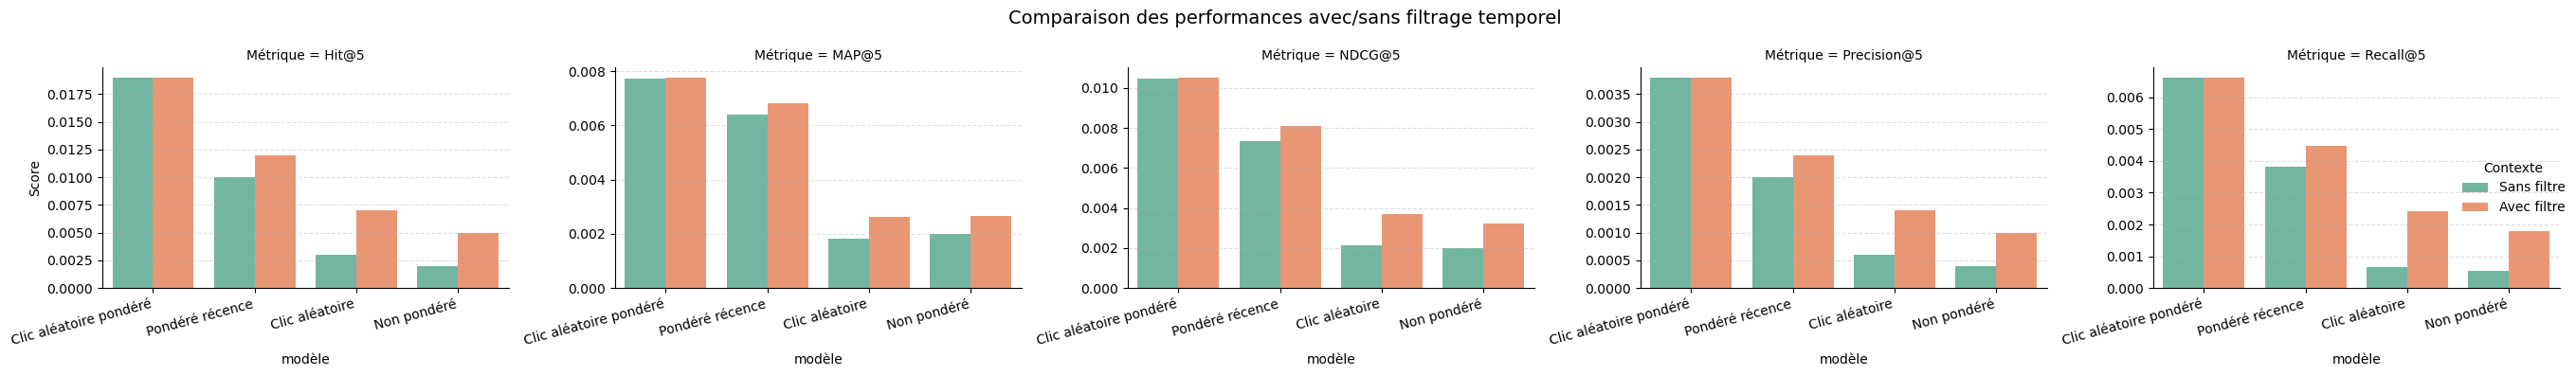

In [79]:
plot_comparative_results_from_csv()


Le filtre temporel sur les articles améliore beaucoup dans le cas le plus simpliste (simple moyenne d'embeddings) de calcul et la prédiction la plus difficile (dernier clic). Dans le cas où on prédit un clic aléatoire et qu'on pondère le fait de filtrer temporellement les articles n'a pas d'influence.

## Influence de la popularité d'un article

In [81]:
def evaluate_prediction_functions_with_popularity(
    user_clicks_df,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    df_articles,
    predict_functions,
    k=5,
    n_users=100,
    seed=42,
    approche="content-based",
    save_csv=True,
    results_path="./results/eval_results.csv"
):
    import numpy as np
    import pandas as pd
    from sklearn.metrics import ndcg_score
    from tqdm import tqdm
    import os

    np.random.seed(seed)
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    sampled_users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    results = {name: {"hit@k": [], "map@k": [], "ndcg@k": [], "precision@k": [], "recall@k": []} for name in predict_functions.keys()}
    hit_users = {name: [] for name in predict_functions.keys()}

    # Dictionnaire d’accès rapide aux clics
    user_clicks_dict = dict(zip(user_clicks_df['user_id'], user_clicks_df['clicked_article_ids']))

    for user_id in tqdm(sampled_users, desc="Évaluation des modèles (avec popularité)"):
        user_clicks = user_clicks_dict.get(user_id, [])
        if len(user_clicks) < 1:
            continue

        target = user_clicks[-1]

        for name, predict_func in predict_functions.items():
            try:
                top_preds, _ = predict_func(
                    user_id, df, embedding_dict, article_ids, article_embeddings, df_articles
                )
                if top_preds is None:
                    continue

                top_ids = [aid for aid, _ in top_preds[:k]]

                # Hit@k
                hit = int(target in top_ids)
                if hit:
                    hit_users[name].append(user_id)

                # MAP@k
                map_k = next((1.0 / (i + 1) for i, aid in enumerate(top_ids) if aid == target), 0.0)

                # NDCG@k
                relevance = [1 if aid == target else 0 for aid in top_ids]
                ndcg = ndcg_score([relevance], [list(reversed(range(len(relevance))))])

                # Precision & Recall
                true_positives = sum([1 for aid in top_ids if aid in user_clicks])
                precision_k = true_positives / k
                recall_k = true_positives / len(user_clicks)

                for metric, val in zip(["hit@k", "map@k", "ndcg@k", "precision@k", "recall@k"],
                                       [hit, map_k, ndcg, precision_k, recall_k]):
                    results[name][metric].append(val)

            except Exception as e:
                print(f"Erreur pour user {user_id} avec le modèle '{name}' : {e}")

    # Résumé final
    summary = []
    for name, scores in results.items():
        summary.append({
            "modèle": name,
            "approche": approche,
            "n_users": len(sampled_users),
            f"Hit@{k}": np.mean(scores["hit@k"]),
            f"MAP@{k}": np.mean(scores["map@k"]),
            f"NDCG@{k}": np.mean(scores["ndcg@k"]),
            f"Precision@{k}": np.mean(scores["precision@k"]),
            f"Recall@{k}": np.mean(scores["recall@k"])
        })

    summary_df = pd.DataFrame(summary).sort_values(f"Hit@{k}", ascending=False)

    # Sauvegarde CSV
    if save_csv:
        os.makedirs(os.path.dirname(results_path), exist_ok=True)
        if os.path.exists(results_path):
            existing_df = pd.read_csv(results_path)
            summary_df = pd.concat([existing_df, summary_df], ignore_index=True)
        summary_df.to_csv(results_path, index=False)

    return summary_df, hit_users


On va faire un test paramétrique sur une option qui donnait de bons résultat la fonction qui tient compte de la récence/fraicheur des articles. C'est une dimension orhtogonale (à priori) à la popularité, donc complémentaire.

In [82]:
def predict_topN_recency_popularity(
    user_id,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    df_articles,
    alpha=0.9,
    beta=1.0,
    pop_alpha=0.8,
    top_n=5
):
    """
    Recommande les top-N articles en combinant :
    - Similarité de contenu pondérée par récence utilisateur (alpha)
    - Fraîcheur des articles (beta)
    - Popularité normalisée (pop_alpha)

    Retour :
    - Liste top-N : (article_id, score_final)
    - article_id du dernier clic
    """
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_article_id = clicked_article_ids[-1]
    past_ids = clicked_article_ids[:-1]

    past_vectors = [embedding_dict[aid] for aid in past_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    embeddings = np.stack(past_vectors)

    # Poids décroissants selon la récence des clics
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)

    # Similarités cosinus
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    # Exclure les clics passés (pas le target)
    clicked_set = set(past_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    if not candidate_indices:
        return None, target_article_id

    # Récupération des infos candidates
    candidate_ids = [article_ids[i] for i in candidate_indices]

    # ⏳ Fraîcheur (récence de publication)
    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])
    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    # ⭐ Popularité normalisée
    popularity_map = df_articles.set_index("article_id")["popularity_norm"].to_dict()
    popularity_scores = np.array([popularity_map.get(aid, 0) for aid in candidate_ids])

    # 📈 Calcul final
    sim_scores = similarities[candidate_indices]
    combined_scores = pop_alpha * sim_scores + (1 - pop_alpha) * popularity_scores
    final_scores = combined_scores * (recency_scores ** beta)

    # Top-N
    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


In [ ]:
# Définir les valeurs de pop_alpha à tester
pop_alphas = [0.8, 0.6, 0.4]

# Dictionnaire des fonctions à tester
predict_functions = {
    f"recency+pop_{int(p * 100)}%": (
        lambda p=p: (  # utiliser lambda p=p pour capturer la valeur de boucle
            lambda user_id, df, embedding_dict, article_ids, article_embeddings, df_articles:
                predict_topN_recency_popularity(
                    user_id,
                    df,
                    embedding_dict,
                    article_ids,
                    article_embeddings,
                    df_articles,
                    alpha=0.9,
                    beta=1.0,
                    pop_alpha=p,
                    top_n=5
                )
        )
    )()
    for p in pop_alphas
}

# Lancer l'évaluation
results_df, hit_users = evaluate_prediction_functions_with_popularity(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    df_articles=df_articles,
    predict_functions=predict_functions,
    k=5,
    n_users=1000,
    seed=42,
    approche="content-based biais de popularité"
)

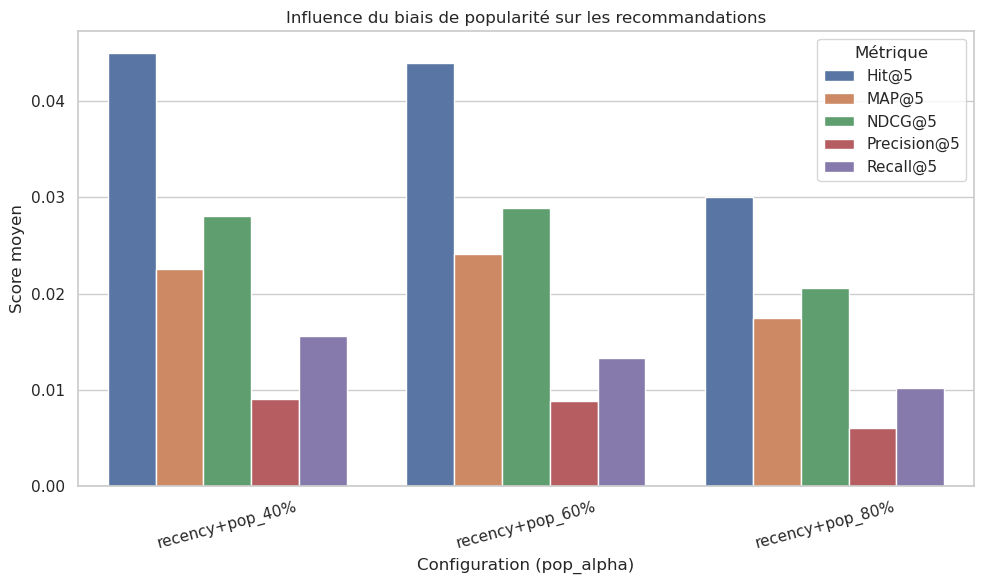

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Filtrer uniquement les modèles recency+pop
filtered_df = results_df[results_df["modèle"].astype(str).str.startswith("recency+pop")].copy()
filtered_df["modèle"] = filtered_df["modèle"].astype(str)

# Sélectionner uniquement les colonnes de métriques (évite 'approche', 'n_users')
metric_cols = [col for col in filtered_df.columns if col.startswith(("Hit@", "MAP@", "NDCG@", "Precision@", "Recall@"))]

# Melt propre
results_df_melted = filtered_df.melt(id_vars="modèle", value_vars=metric_cols,
                                     var_name="Métrique", value_name="Score")
results_df_melted["modèle"] = results_df_melted["modèle"].astype(str)
results_df_melted["Métrique"] = results_df_melted["Métrique"].astype(str)

# Ordre logique des modèles
order = sorted(
    filtered_df["modèle"].unique().tolist(),
    key=lambda x: int(x.split("_")[-1].replace("%", ""))
)

# Tracé
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df_melted,
    x="modèle", y="Score", hue="Métrique",
    order=order
)
plt.title("Influence du biais de popularité sur les recommandations")
plt.ylabel("Score moyen")
plt.xlabel("Configuration (pop_alpha)")
plt.xticks(rotation=15)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()


In [100]:
import itertools
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm  # ✅ version pour Jupyter
from sklearn.metrics import ndcg_score

# Grilles à tester
alpha_vals = [0.9, 0.8]
beta_vals = [1.0, 0.5]
pop_alpha_vals = [0.8, 0.6, 0.4]

grid_results = []

# Boucle sur les combinaisons de paramètres
for alpha, beta, pop_alpha in tqdm(list(itertools.product(alpha_vals, beta_vals, pop_alpha_vals)),
                                    desc="Grid Search 3D"):

    def custom_predict_func(user_id, df, embedding_dict, article_ids, article_embeddings, df_articles):
        return predict_topN_recency_popularity(
            user_id,
            df,
            embedding_dict,
            article_ids,
            article_embeddings,
            df_articles,
            alpha=alpha,
            beta=beta,
            pop_alpha=pop_alpha,
            top_n=5
        )

    predict_functions = {
        f"α={alpha}_β={beta}_pop={pop_alpha}": custom_predict_func
    }

    results_df, hit_users = evaluate_prediction_functions_with_popularity(
        user_clicks_df=user_clicks_df,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        df_articles=df_articles,
        predict_functions=predict_functions,
        k=5,
        n_users=1000,
        seed=42,
        approche="content-based biais de popularité grille 3D"
    )

    for _, row in results_df.iterrows():
        grid_results.append({
            "alpha": alpha,
            "beta": beta,
            "pop_alpha": pop_alpha,
            "Hit@5": row["Hit@5"],
            "MAP@5": row["MAP@5"],
            "NDCG@5": row["NDCG@5"],
            "Precision@5": row["Precision@5"],
            "Recall@5": row["Recall@5"]
        })

# Résultat final
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values("Hit@5", ascending=False)


Grid Search 3D: 100%|██████████| 12/12 [57:39<00:00, 288.32s/it]


,alpha,beta,pop_alpha,Hit@5,MAP@5,NDCG@5,Precision@5,Recall@5
172,0.8,0.5,0.8,0.047,0.024233,0.029735,0.0094,0.014256
217,0.8,0.5,0.4,0.047,0.024233,0.029735,0.0094,0.014256
194,0.8,0.5,0.6,0.047,0.024233,0.029735,0.0094,0.014256
151,0.8,1.0,0.4,0.047,0.024233,0.029735,0.0094,0.014256
131,0.8,1.0,0.6,0.047,0.024233,0.029735,0.0094,0.014256
...,...,...,...,...,...,...,...,...
97,0.8,1.0,0.8,0.000,0.000000,0.000000,0.0000,0.000000
202,0.8,0.5,0.4,0.000,0.000000,0.000000,0.0000,0.000000
17,0.9,1.0,0.6,0.000,0.000000,0.000000,0.0000,0.000000
31,0.9,1.0,0.4,0.000,0.000000,0.000000,0.0000,0.000000


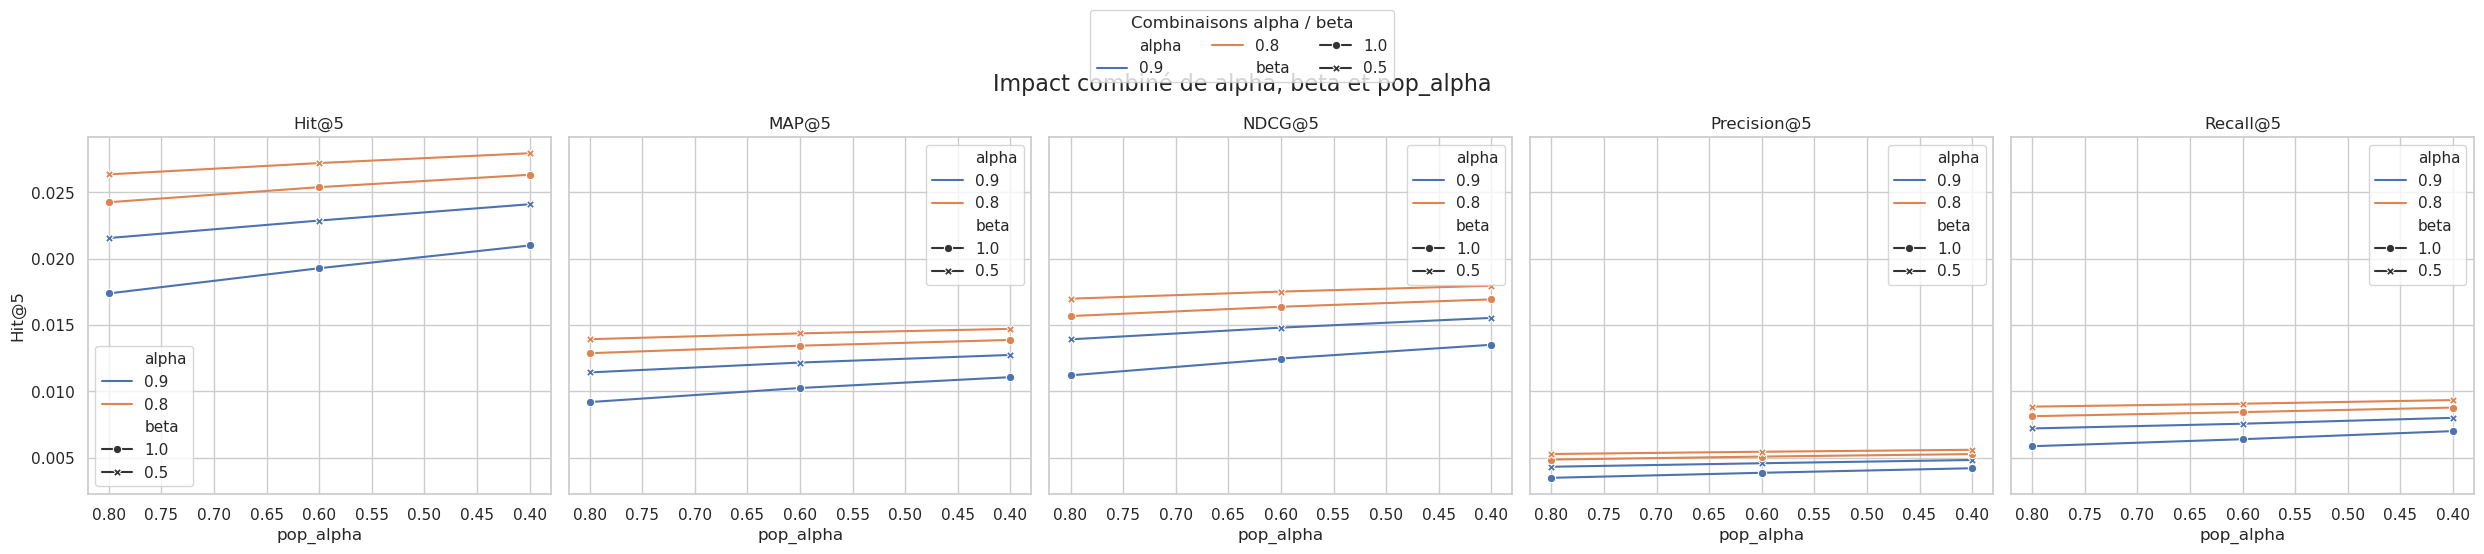

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Forcer les types pour éviter les erreurs de typage
grid_results_df["alpha"] = grid_results_df["alpha"].astype(str)
grid_results_df["beta"] = grid_results_df["beta"].astype(str)

# Filtrer uniquement les colonnes de métriques
metric_cols = [col for col in grid_results_df.columns if col.startswith(("Precision@", "Recall@", "Hit@", "MAP@", "NDCG@"))]

# S’assurer que toutes les valeurs des métriques sont numériques
grid_results_df[metric_cols] = grid_results_df[metric_cols].apply(pd.to_numeric, errors="coerce")

# Configuration de la figure
n_metrics = len(metric_cols)
fig, axs = plt.subplots(1, n_metrics, figsize=(5 * n_metrics, 5), sharey=True)

# Tracés des courbes
for i, metric in enumerate(metric_cols):
    sns.lineplot(
        data=grid_results_df,
        x="pop_alpha",
        y=metric,
        hue="alpha",
        style="beta",
        errorbar=None,
        markers=True,
        dashes=False,
        ax=axs[i]
    )
    axs[i].invert_xaxis()
    axs[i].set_title(metric)
    axs[i].grid(True)

# Titre global
plt.suptitle("Impact combiné de alpha, beta et pop_alpha", fontsize=16)

# Légende partagée
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=3, title="Combinaisons alpha / beta")

# Ajustements
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Affichage
plt.show()

🔍 Observations 

pop_alpha élevé donne des scores plus faibles<br>
beta faible est un peu meilleur <br>
alpha = 0.8 semble être un bon compromis

choix: pop_alpha=0.6 beta=0.5, alpha=0.8

## Filtrage des users: Utilisateurs dans la moyenne vs power users

In [12]:
# Echantillonage parmi les utilisateurs normaux et les power_users
normal_users_sample = df[df["user_status"] == "normal"]["user_id"].drop_duplicates().sample(500, random_state=42)
power_users_sample = df[df["user_status"] == "power_user"]["user_id"].drop_duplicates().sample(500, random_state=42)

In [13]:
def recommend_articles(user_id, recency=True, pop=True, pop_alpha=0.6, alpha=0.8, beta=0.5, top_n=10):
    user_clicks = df[df['user_id'] == user_id]
    user_clicked_articles = user_clicks['click_article_id'].unique()

    candidate_articles = df[~df['click_article_id'].isin(user_clicked_articles)][['click_article_id', 'click_timestamp']].copy()

    if candidate_articles.empty:
        return []

    if recency:
        last_click_ts = user_clicks['click_timestamp'].max()
        candidate_articles['recency_score'] = (candidate_articles['click_timestamp'] - last_click_ts).abs()
        candidate_articles['recency_score'] = candidate_articles['recency_score'].rank(pct=True)
        candidate_articles['recency_score'] = candidate_articles['recency_score'].apply(lambda x: alpha * ((1 - x) ** beta))
    else:
        candidate_articles['recency_score'] = 0

    if pop:
        article_click_counts = df['click_article_id'].value_counts()
        candidate_articles['popularity_score'] = candidate_articles['click_article_id'].map(article_click_counts).fillna(0)
        candidate_articles['popularity_score'] = (candidate_articles['popularity_score'] / candidate_articles['popularity_score'].max()) ** pop_alpha
    else:
        candidate_articles['popularity_score'] = 0

    candidate_articles['combined_score'] = candidate_articles['recency_score'] + candidate_articles['popularity_score']

    recommended_articles = (
        candidate_articles
        .groupby('click_article_id')['combined_score']
        .mean()
        .sort_values(ascending=False)
        .head(top_n)
        .index
        .tolist()
    )

    return recommended_articles


In [14]:
from tqdm.notebook import tqdm

tqdm.pandas(desc="Calcul des recommandations")

# Générer des recommandations pour les utilisateurs normaux avec barre de progression
normal_recommendations = normal_users_sample.progress_apply(
    lambda uid: recommend_articles(uid, recency=True, pop=True, pop_alpha=0.6, alpha=0.9, beta=1)
)

# Générer des recommandations pour les power users avec barre de progression
power_recommendations = power_users_sample.progress_apply(
    lambda uid: recommend_articles(uid, recency=True, pop=True, pop_alpha=0.6, alpha=0.9, beta=1)
)

Calcul des recommandations:   0%|          | 0/500 [00:00<?, ?it/s]

Calcul des recommandations:   0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import ndcg_score
from tqdm.notebook import tqdm

def evaluate_precomputed_recommendations(user_recommendations, user_clicks_df, k=5):
    """
    Évalue des recommandations pré-calculées pour les utilisateurs.

    Paramètres :
    - user_recommendations : Series {user_id: [article_ids]}
    - user_clicks_df : DataFrame {'user_id', 'clicked_article_ids'}
    - k : nombre d'articles recommandés

    Retourne :
    - dict avec les métriques moyennes : Hit@k, MAP@k, NDCG@k, Precision@k, Recall@k
    """
    hits, maps, ndcgs, precisions, recalls = [], [], [], [], []

    for user_id, recommended_articles in tqdm(user_recommendations.items(), desc="Évaluation recommandations"):
        actual_articles = user_clicks_df[user_clicks_df['user_id'] == user_id]['clicked_article_ids']
        if actual_articles.empty:
            continue
        actual_articles = actual_articles.iloc[0]

        # Hit@k
        hit = int(any(aid in actual_articles for aid in recommended_articles[:k]))
        hits.append(hit)

        # MAP@k
        map_k = 0.0
        for i, aid in enumerate(recommended_articles[:k]):
            if aid in actual_articles:
                map_k = 1.0 / (i + 1)
                break
        maps.append(map_k)

        # NDCG@k
        relevance = [1 if aid in actual_articles else 0 for aid in recommended_articles[:k]]
        ndcg = ndcg_score([relevance], [list(reversed(range(len(relevance))))])
        ndcgs.append(ndcg)

        # Precision@k
        precision_k = sum(relevance) / k
        precisions.append(precision_k)

        # Recall@k
        recall_k = sum(relevance) / len(actual_articles) if len(actual_articles) > 0 else 0.0
        recalls.append(recall_k)

    return {
        f"Hit@{k}": np.mean(hits),
        f"MAP@{k}": np.mean(maps),
        f"NDCG@{k}": np.mean(ndcgs),
        f"Precision@{k}": np.mean(precisions),
        f"Recall@{k}": np.mean(recalls)
    }


In [16]:
# Normal users metrics
normal_metrics = evaluate_precomputed_recommendations(normal_recommendations, user_clicks_df, k=5)

# Power users metrics
power_metrics = evaluate_precomputed_recommendations(power_recommendations, user_clicks_df, k=5)

# Affichage des résultats
print("📌 Normal Users Metrics:")
for metric, score in normal_metrics.items():
    print(f"{metric}: {score:.4f}")

print("\n📌 Power Users Metrics:")
for metric, score in power_metrics.items():
    print(f"{metric}: {score:.4f}")


Évaluation recommandations: 0it [00:00, ?it/s]

Évaluation recommandations: 0it [00:00, ?it/s]

📌 Normal Users Metrics:
Hit@5: 0.1538
MAP@5: 0.0899
NDCG@5: 0.1040
Precision@5: 0.0442
Recall@5: 0.0251

📌 Power Users Metrics:
Hit@5: 0.2189
MAP@5: 0.1131
NDCG@5: 0.1387
Precision@5: 0.0572
Recall@5: 0.0371


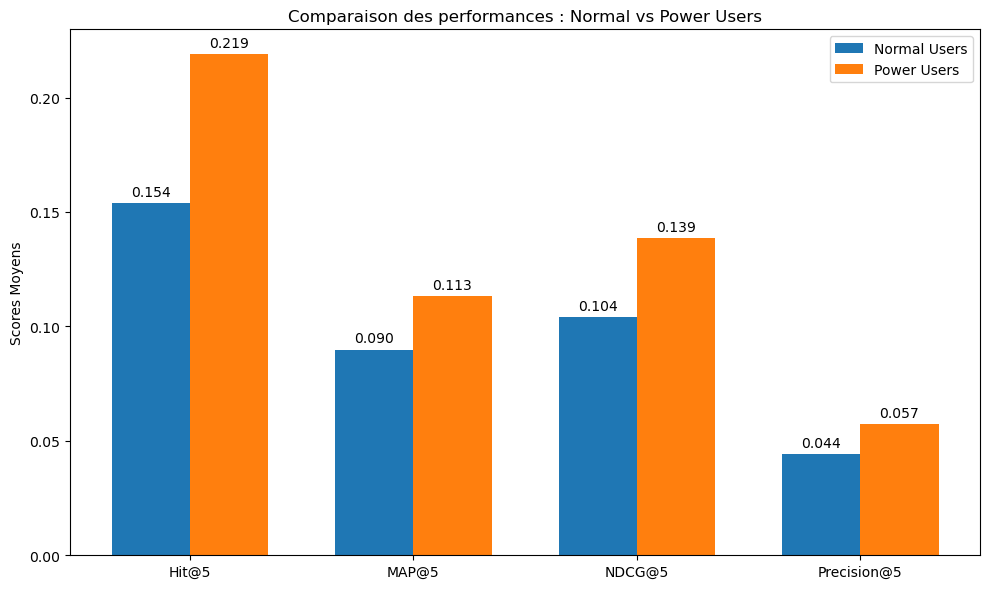

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Métriques évaluées
metrics = ['Hit@5', 'MAP@5', 'NDCG@5', 'Precision@5']

# Valeurs pour chaque groupe d'utilisateurs
normal_values = [normal_metrics[m] for m in metrics]
power_values = [power_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, normal_values, width, label='Normal Users')
bar2 = ax.bar(x + width/2, power_values, width, label='Power Users')

# Ajout des titres et étiquettes
ax.set_ylabel('Scores Moyens')
ax.set_title('Comparaison des performances : Normal vs Power Users')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Ajout des valeurs précises sur les barres
ax.bar_label(bar1, padding=3, fmt='%.3f')
ax.bar_label(bar2, padding=3, fmt='%.3f')

fig.tight_layout()

plt.show()


✅ Les power users ont un meilleur score :
1. Historique plus riche ➜ Profil utilisateur plus précis

    Les modèles content-based construisent un profil vectoriel de l’utilisateur à partir de ses clics passés.

    Un power-user a plus de clics → donc :

        Profil utilisateur plus dense

        Moins de bruit

        Meilleure estimation des préférences

👉 Cela se traduit directement par une meilleure pertinence des recommandations.
2. Meilleure couverture sur les embeddings

    Avec plus d’articles lus, le vecteur moyen d’un power-user couvre plus de clusters thématiques dans l’espace des embeddings.

    Cela permet :

        D'éviter le sur-ajustement sur 1 ou 2 articles récents

        D'identifier des similarités fines entre articles recommandés et le profil

3. Réduction du bruit / cold-start

    Pour les utilisateurs "normaux", on est souvent à la limite du cold-start : parfois 1 ou 2 articles cliqués ➜ trop peu pour capturer un réel signal de préférence.

    Cela mène à des recommandations génériques ou moins pertinentes, même si techniquement le modèle fonctionne.

# Conclusion sur le content-based

18 [-0.23987054 -0.05276148]
21 [-0.84531618 -0.44323644]
2 [0.25157354 0.5302854 ]
3 [-0.84620752  0.98959981]
4 [ 0.39200623 -0.33685119]


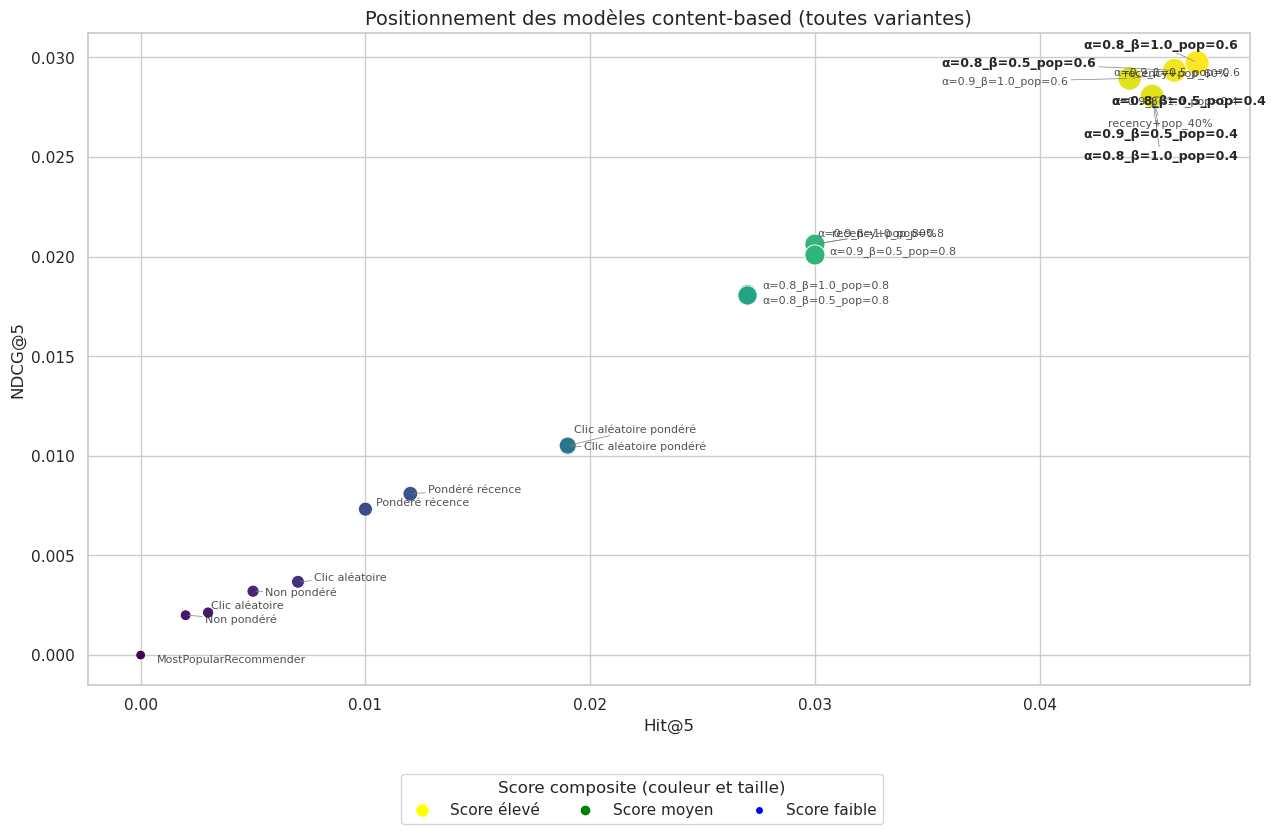

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Chargement des résultats
df = pd.read_csv("./results/eval_results.csv")

# Calcul d'un score composite
df["score_composite"] = (
    0.4 * df["Hit@5"] +
    0.4 * df["NDCG@5"] +
    0.2 * df["Precision@5"]
)

# Sélection des 5 meilleurs modèles
top_df = df.sort_values("score_composite", ascending=False).head(5)
rest_df = df[~df.index.isin(top_df.index)]

# Création du graphique principal
fig, ax = plt.subplots(figsize=(13, 8))
scatter = sns.scatterplot(
    data=df,
    x="Hit@5", y="NDCG@5",
    hue="score_composite",
    size="Precision@5",
    palette="viridis", sizes=(50, 300), legend=False, ax=ax
)

# Labels des points
texts = []

# Top modèles (gras)
for _, row in top_df.iterrows():
    texts.append(ax.text(row["Hit@5"], row["NDCG@5"], row["modèle"], fontsize=9, fontweight="bold"))

# Autres modèles (normal)
for _, row in rest_df.iterrows():
    texts.append(ax.text(row["Hit@5"], row["NDCG@5"], row["modèle"], fontsize=8, alpha=0.8))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Titre et axes
ax.set_title("Positionnement des modèles content-based (toutes variantes)", fontsize=14)
ax.set_xlabel("Hit@5")
ax.set_ylabel("NDCG@5")
ax.grid(True)

# Légendes manuelles à part sous le graphe
from matplotlib.lines import Line2D

# Créer des légendes personnalisées
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Score élevé', markerfacecolor='yellow', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Score moyen', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Score faible', markerfacecolor='blue', markersize=6)
]

# Ajouter la légende horizontalement sous le graphe
fig.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(0.5, -0.05),
           ncol=3, title="Score composite (couleur et taille)")

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Réserve de la place en bas pour la légende
plt.show()
